# Libraries

In [1]:
import pandas as pd
from  tqdm import tqdm
import math
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from collections import OrderedDict
import seaborn
from datetime import datetime
import scipy.stats
import scipy
from scipy import stats
from scipy.stats import fisher_exact
from scipy.stats import ks_2samp
from sklearn.linear_model import LinearRegression
import statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
import time
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')




# [RQ1]  
Exploratory Data Analysis (EDA)

The authors file can be read in it's integrity because it is not as demanding as the book one, thus we load the second file using chunks, but here we are processing only 10000 rows and we'll later show how we managed to view it entirely.

In [ ]:
chunk_size = 10000
chunks = []

for chunk in pd.read_json(r"list.json", lines=True, chunksize=chunk_size):
    chunks.append(chunk)

listDf = pd.concat(chunks, ignore_index=True)

In [ ]:
authors_df = pd.read_json('lighter_authors.json', lines = True)
authorsDf = authors_df 
df_authors_question_five = authors_df
adf = authors_df

In [ ]:
chunk_s = 100000
books_df = pd.read_json('lighter_books.json', lines = True, nrows = chunk_s)
booksDf = books_df
bdf = books_df
df_books_question_five = books_df
booksDf_org = books_df

 The first thing we do is visualizing the first five rows to get an idea of the structure embedded in the data frames

In [5]:
authors_df.head(5)

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


In [6]:
books_df.head(5)

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description
0,2,Harry Potter and the Order of the Phoenix (Har...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2809203,0439358078,9780439358071,,eng,...,Paperback,US Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,870,45175,Harry Potter,5,"[{'name': 'to-read', 'count': 324191}, {'name'...",There is a door at the end of a silent corrido...
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,4640799,,,,eng,...,Hardcover,Library Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc,309,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63540}, {'name':...",Harry Potter's life is miserable. His parents ...
2,4,Harry Potter and the Chamber of Secrets (Harry...,None,J.K. Rowling,1077326,6231171,0439554896,9780439554893,,eng,...,Hardcover,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,352,45175,Harry Potter,2,"[{'name': 'to-read', 'count': 282341}, {'name'...",The Dursleys were so mean and hideous that sum...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2402163,043965548X,9780439655484,,eng,...,Mass Market Paperback,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,435,45175,Harry Potter,3,"[{'name': 'to-read', 'count': 292815}, {'name'...","For twelve long years, the dread fortress of A..."
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,3046572,,,,eng,...,Paperback,First Scholastic Trade Paperback Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,734,45175,Harry Potter,4,"[{'name': 'to-read', 'count': 287086}, {'name'...",Harry Potter is midway through his training as...


We can also have a look at the last 5 rows

In [7]:
authors_df.tail(5)

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
351762,19,4.26,3,"[79663810, 56338563, 65881656]","[53075671, 35051340, 42264980]",3,16777034,Lyon Gamer,male,https://images.gr-assets.com/authors/149373532...,Lyon Gamer<br />nickname sotto cui si nasconde...,0
351763,11,3.36,2,[42091916],[22604300],1,16777055,Brian Hatch,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"Brian was born, he lived a little, and he has ...",0
351764,23,3.78,5,"[61906297, 61366902, 45107362]","[40246014, 39710679, 25363358]",3,16777067,Nicholas Baer,male,https://s.gr-assets.com/assets/nophoto/user/m_...,Nicholas Baer is Visiting Assistant Professor ...,1
351765,0,0.00,0,[50301486],[29919838],1,16777091,James Ketron Ross,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"James Ross was a physician, winemaker, artist,...",0
351766,1,5.00,0,[49933850],[29597374],1,16777164,James Ross,,https://s.gr-assets.com/assets/nophoto/user/u_...,<i>Librarian Note: There is more than one auth...,0


In [8]:
books_df.tail(5)

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description
99979,180123,Total Workday Control Using Microsoft Outlook,None,Michael Linenberger,104978,13731267,0974930415,9780974930411,,,...,Paperback,,https://s.gr-assets.com/assets/nophoto/book/11...,New Academy Publishing,289,,,,"[{'name': 'to-read', 'count': 163}, {'name': '...",Total Workday Control Using Microsoft Outlook ...
99980,180136,Desata Tu Poder Ilimitado!,"[{'id': '5627', 'name': 'Anthony Robbins', 'ro...",Anthony Robbins,5627,20409653,8495542056,9788495542052,,,...,Paperback,,https://s.gr-assets.com/assets/nophoto/book/11...,VS Ediciones,450,,,,"[{'name': 'to-read', 'count': 285}, {'name': '...",A step-by-step guide for African Americans com...
99981,180137,Poder Sin Limites: La Nueva Ciencia del Desarr...,None,Anthony Robbins,5627,165637,9707800941,9789707800946,,spa,...,,,https://i.gr-assets.com/images/S/compressed.ph...,,393,,,,"[{'name': 'to-read', 'count': 32045}, {'name':...",«La vida pagará cualquier precio que tú pidas....
99982,180139,Introduction To Anthony Robbins Personal Power II,None,Anthony Robbins,5627,79231,1559274204,9781559274203,,,...,Audio Cassette,,https://i.gr-assets.com/images/S/compressed.ph...,Audio Renaissance,4,,,,"[{'name': 'to-read', 'count': 979}, {'name': '...","<br /><div>For nearly two decades, Anthony Rob..."
99983,180140,Controle su destino/ Awaken the Giant Within,None,Anthony Robbins,5627,1899199,849793878X,9788497938785,,,...,Paperback,,https://i.gr-assets.com/images/S/compressed.ph...,,718,,,,"[{'name': 'to-read', 'count': 72331}, {'name':...",Wake up and take control of your life! From th...


Now we can extract 5 random rows from the dataset

In [9]:
authors_df.sample(5)

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
309705,6834,4.08,863,"[60501602, 73636713, 59804292, 62832652, 66336...","[38926264, 53158382, 45450810, 40504210, 43511...",46,14058028,Elizabeth Stevens,female,https://images.gr-assets.com/authors/151809357...,<b>Writer. Reader. Perpetual student. Nerd.</b...,229
107360,0,0.00,0,"[5454047, 5323331]","[5386532, 5256030]",2,1663013,Óscar González-Quevedo,male,https://images.gr-assets.com/authors/134484619...,"Father Óscar González Quevedo, born in Spain a...",2
330150,15,3.33,3,"[50120764, 57976448, 54345920, 68157030, 73378...","[29760445, 36305954, 33562009, 43802666, 51524...",7,15143898,蘇上豪,,https://s.gr-assets.com/assets/nophoto/user/u_...,高雄人。現為臺北市博仁綜合醫院心臟血管外科主任。 <br />1985年進入國防醫學院醫學系...,1
38452,89,3.96,15,"[436861, 3008601]","[448202, 2978236]",2,251745,H.R. DeMallie,,https://s.gr-assets.com/assets/nophoto/user/u_...,H.R. DeMallie is a veteran of World War II and...,0
300227,102,4.27,57,"[43491650, 57437091, 58335891, 66487861, 74481...","[23883173, 35910232, 36593552, 42752027, 49047...",6,12397483,Andrea Jo Rodgers,female,https://images.gr-assets.com/authors/143108888...,"<a target=""_blank"" rel=""noopener nofollow"" hre...",69


In [10]:
books_df.sample(5)

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description
3612,5754,How the Mind Works,None,Steven Pinker,3915,2085667,,,,eng,...,Paperback,,https://s.gr-assets.com/assets/nophoto/book/11...,Penguin Books,660,,,,"[{'name': 'to-read', 'count': 62350}, {'name':...","In this follow-up to The Language Instinct, th..."
55211,91839,"Jackaroo (Kingdom, #1)",None,Cynthia Voigt,7540,2815,0812448103,9780812448108,,,...,Hardcover,,https://s.gr-assets.com/assets/nophoto/book/11...,Perfection Learning,358,40382,Tales of the Kingdom,1,"[{'name': 'to-read', 'count': 3146}, {'name': ...","""Voigt is extraordinary in her subtle developm..."
66409,112521,The Art of Joyful Living,None,Swami Rama,81372,108340,089389236X,9780893892364,,eng,...,Paperback,,https://s.gr-assets.com/assets/nophoto/book/11...,Himalayan Institute Press,177,,,,"[{'name': 'to-read', 'count': 476}, {'name': '...","In The Art of Joyful Living, Swami Rama impart..."
42713,69598,Games Were Coming,None,Michael Anthony,39188,67436,0435980335,9780435980337,,,...,Paperback,,https://i.gr-assets.com/images/S/compressed.ph...,Heinemann Educational Books,128,,,,"[{'name': 'to-read', 'count': 59}, {'name': 'c...",Leon is in training for the great bicycle race...
72241,123295,On the Road With the Archangel,None,Frederick Buechner,19982,1224265,0060611251,9780060611255,,,...,Hardcover,,https://s.gr-assets.com/assets/nophoto/book/11...,HarperOne,160,,,,"[{'name': 'to-read', 'count': 211}, {'name': '...",One of the brightest lights in late-twentieth-...


We trimmed the dataset to exclude all the unnecessary columns to make it more readable

In [11]:
columns_to_keep = ['title', 'author_name', 'author_id', 'work_id', 'language', 'average_rating', 'ratings_count', 'text_reviews_count', 'publication_date', 'original_publication_date', 'num_pages', 'series_id']

filtered_data = booksDf[columns_to_keep]


#filtered_data.to_json('trimmed_books5.json', orient='records', lines=True)

With the command .shape we get the numbers of rows and columns of the dataframe

In [12]:
print(authors_df.shape)
print('Number of rows: ', authors_df.shape[0])
print('Number of columns: ', authors_df.shape[1])

(351767, 12)
Number of rows:  351767
Number of columns:  12


In [13]:
print(books_df.shape)
print('Number of rows: ', books_df.shape[0])
print('Number of columns: ', books_df.shape[1])

(99984, 26)
Number of rows:  99984
Number of columns:  26


The number of elements contained in the data frames is obtained using .size()

In [14]:
print(authors_df.size)

4221204


We can get the names of the columns with another method compared to one used for the first table

In [15]:
print(authors_df.columns)

Index(['ratings_count', 'average_rating', 'text_reviews_count', 'work_ids',
       'book_ids', 'works_count', 'id', 'name', 'gender', 'image_url', 'about',
       'fans_count'],
      dtype='object')


In [16]:
print(books_df.columns)

Index(['id', 'title', 'authors', 'author_name', 'author_id', 'work_id', 'isbn',
       'isbn13', 'asin', 'language', 'average_rating', 'rating_dist',
       'ratings_count', 'text_reviews_count', 'publication_date',
       'original_publication_date', 'format', 'edition_information',
       'image_url', 'publisher', 'num_pages', 'series_id', 'series_name',
       'series_position', 'shelves', 'description'],
      dtype='object')


We get a summary of the data types in authors_df and we notice that half of the columns contain object as data type ('work_ids', 'book_ids', 'name', 'gender', 'image_url' and 'about'). Whereas the other half is composed mainly by int64 ('ratings_count',text_reviews_count', 'works_count', 'id', 'fans_count') with the exception of one float64 ('average_rating').

In [17]:
authors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB


In this case we'll see the amount of non null entries only for the 10000 rows imported

In [18]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99984 entries, 0 to 99983
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         99984 non-null  int64  
 1   title                      99984 non-null  object 
 2   authors                    34259 non-null  object 
 3   author_name                99984 non-null  object 
 4   author_id                  99984 non-null  int64  
 5   work_id                    99984 non-null  int64  
 6   isbn                       99984 non-null  object 
 7   isbn13                     99984 non-null  object 
 8   asin                       99984 non-null  object 
 9   language                   99984 non-null  object 
 10  average_rating             99984 non-null  float64
 11  rating_dist                99984 non-null  object 
 12  ratings_count              99984 non-null  int64  
 13  text_reviews_count         99984 non-null  int

Getting overall statistics about the numerical columns from the datasets

In [19]:
authors_df.describe()

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.517670e+05,351767.000000,351767.000000,3.517670e+05,3.517670e+05,351767.000000
mean,4.770586e+03,3.651194,330.993243,2.593714e+01,7.751861e+06,111.615731
std,9.769395e+04,1.211482,3857.539191,3.066083e+03,6.578409e+06,2661.018139
min,-4.100000e+01,-31.000000,0.000000,0.000000e+00,4.000000e+00,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.535315e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470396e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434041e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


In [20]:
books_df.describe()

,id,author_id,work_id,average_rating,ratings_count,text_reviews_count
count,99984.000000,9.998400e+04,9.998400e+04,99984.000000,9.998400e+04,99984.000000
mean,84819.740098,6.843063e+05,2.858894e+06,3.827090,4.522036e+04,1253.207613
std,51714.990145,2.315750e+06,9.421976e+06,0.692622,2.658542e+05,5678.835099
min,2.000000,4.000000e+00,6.200000e+01,0.000000,0.000000e+00,0.000000
25%,39873.750000,7.419000e+03,8.251775e+04,3.710000,5.800000e+01,5.000000
50%,82298.500000,2.418600e+04,1.683725e+05,3.930000,5.910000e+02,41.000000
75%,128059.250000,7.098400e+04,1.716845e+06,4.130000,5.843000e+03,302.000000
max,180140.000000,2.097942e+07,8.972161e+07,5.000000,7.377351e+06,116930.000000


## Univariate Analysis

#### Columns of the author dataset

##### gender

Before analyzing the variable gender with plots, is necessary to clean the data in order to make it more meaningful

In [21]:
authors_df['gender'] = authors_df['gender'].apply(lambda x: 'other' if x.strip() == ' ' or x.strip() not in ['male', 'female'] else x)

In [22]:
authors_df['gender'].value_counts()

gender
male      138179
female    109878
other     103710
Name: count, dtype: int64

<Axes: ylabel='count'>

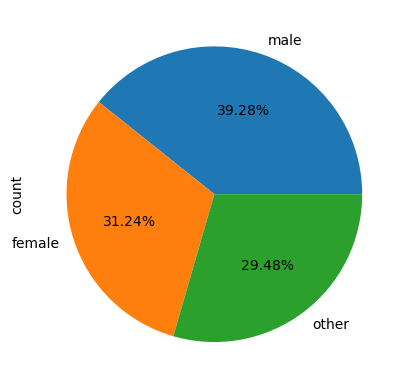

In [23]:
authors_df['gender'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

<Axes: xlabel='gender', ylabel='Count'>

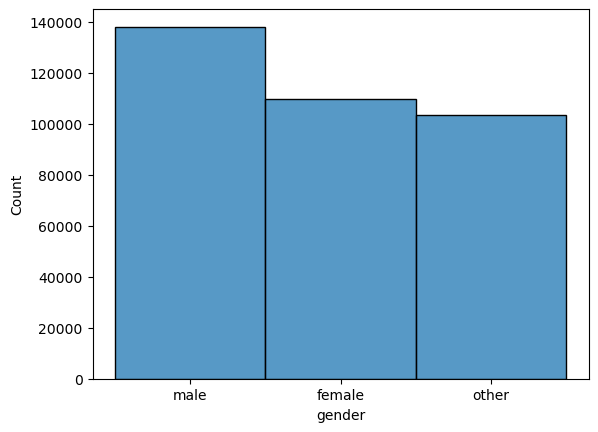

In [24]:
sns.histplot(authors_df['gender'])

##### ratings_count

In [25]:
authors_df['ratings_count'] = authors_df.loc[authors_df['ratings_count'] >= 0, 'ratings_count']

In [26]:
authors_df[['ratings_count']].describe()

,ratings_count
count,3.517630e+05
mean,4.770641e+03
std,9.769451e+04
min,0.000000e+00
25%,6.000000e+00
50%,3.900000e+01
75%,3.100000e+02
max,2.700375e+07


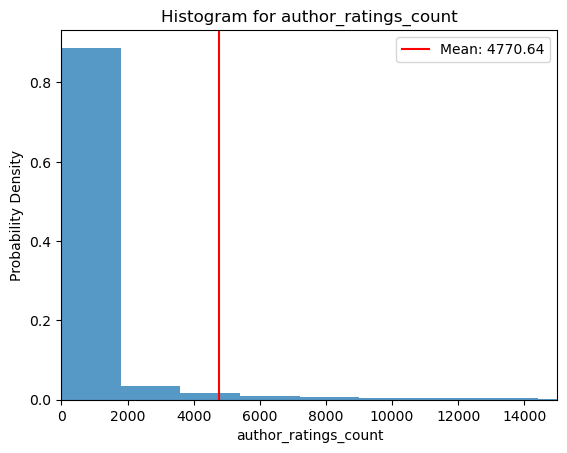

In [27]:
sns.histplot(authors_df['ratings_count'], bins = 15000, stat = 'probability')
plt.xlabel('author_ratings_count')
plt.ylabel('Probability Density')
plt.xlim(0,15000)
plt.title('Histogram for author_ratings_count')

mean = authors_df['ratings_count'].mean()
plt.axvline(x = mean, color = 'red', label = f'Mean: {mean:.2f}')
plt.legend()


plt.show()

(0.0, 800.0)

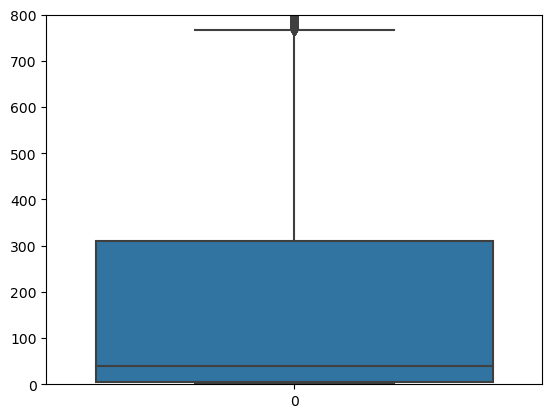

In [28]:
sns.boxplot(authors_df['ratings_count'])
plt.ylim(0,800)

##### average_rating

For this variable the adjustments needed are to remove the occurencies that don't make sense, like a number of ratings that's negative

In [29]:
authors_df['average_rating'] = authors_df.loc[authors_df['average_rating'] >= 0, 'average_rating']

In [30]:
authors_df[['average_rating']].describe()

,average_rating
count,351766.000000
mean,3.651293
std,1.210074
min,0.000000
25%,3.600000
50%,3.950000
75%,4.250000
max,5.000000


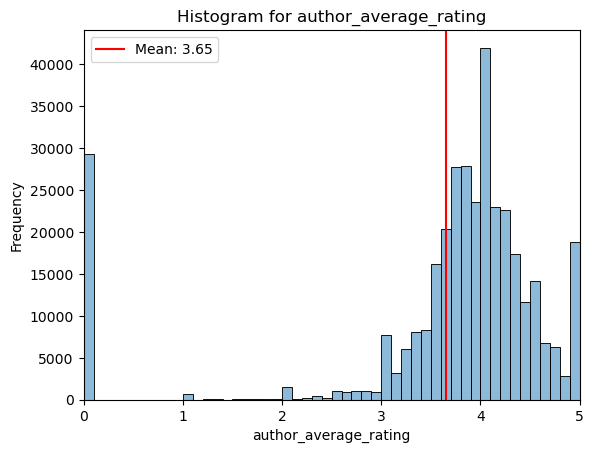

In [31]:
sns.histplot(authors_df[['average_rating']], bins= 50)
plt.xlabel('author_average_rating')
plt.ylabel('Frequency')
plt.xlim(0,5)
plt.title('Histogram for author_average_rating')

mean = authors_df['average_rating'].mean()
plt.axvline(x = mean, color = 'red', label = f'Mean: {mean:.2f}')
plt.legend()

plt.show()

(0.0, 5.0)

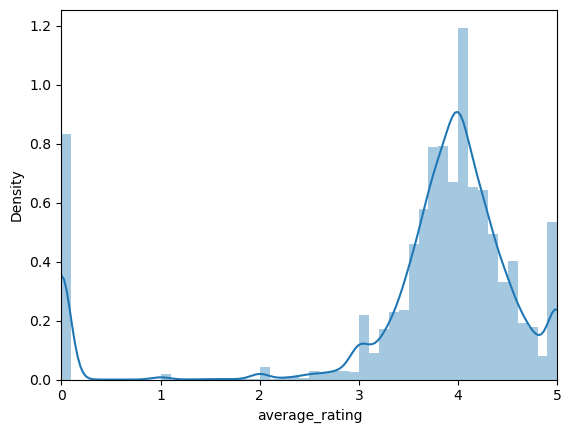

In [32]:
sns.distplot(authors_df['average_rating'])
plt.xlim(0,5)

In [33]:
authors_df['average_rating'].skew()

-2.1822397133869074

(0.0, 5.0)

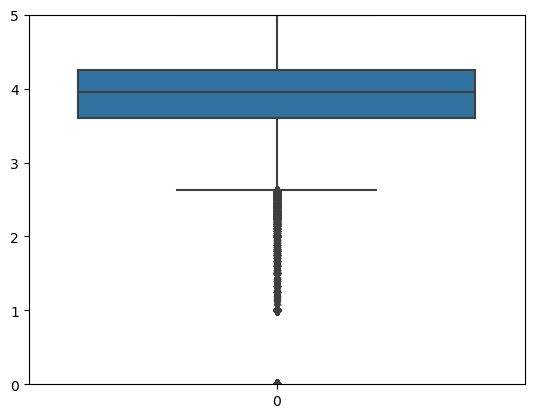

In [34]:
sns.boxplot(authors_df['average_rating'])
plt.ylim(0,5)

##### text_reviews_count

In [35]:
authors_df['text_reviews_count'].describe()

count    351767.000000
mean        330.993243
std        3857.539191
min           0.000000
25%           1.000000
50%           8.000000
75%          53.000000
max      608956.000000
Name: text_reviews_count, dtype: float64

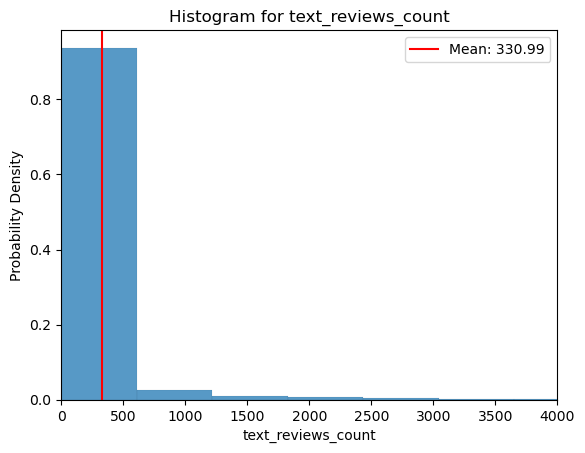

In [36]:
sns.histplot(authors_df['text_reviews_count'], bins= 1000, stat = 'probability')
plt.xlabel('text_reviews_count')
plt.ylabel('Probability Density')
plt.xlim(0,4000)
plt.title('Histogram for text_reviews_count')

mean = authors_df['text_reviews_count'].mean()
plt.axvline(x = mean, color = 'red', label = f'Mean: {mean:.2f}')
plt.legend()

plt.show()

(0.0, 150.0)

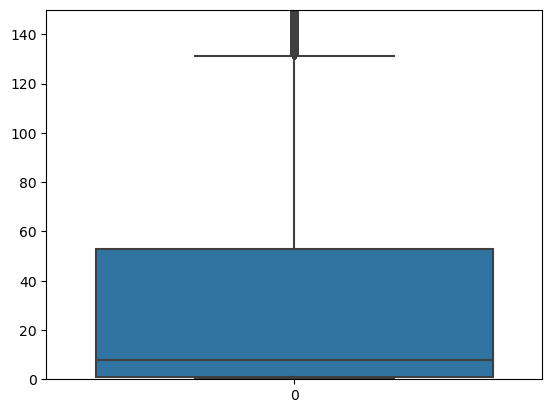

In [37]:
sns.boxplot(authors_df['text_reviews_count'])
plt.ylim(0,150)

##### works_count

In [38]:
authors_df[['works_count']].describe()

,works_count
count,3.517670e+05
mean,2.593714e+01
std,3.066083e+03
min,0.000000e+00
25%,2.000000e+00
50%,6.000000e+00
75%,1.500000e+01
max,1.775176e+06


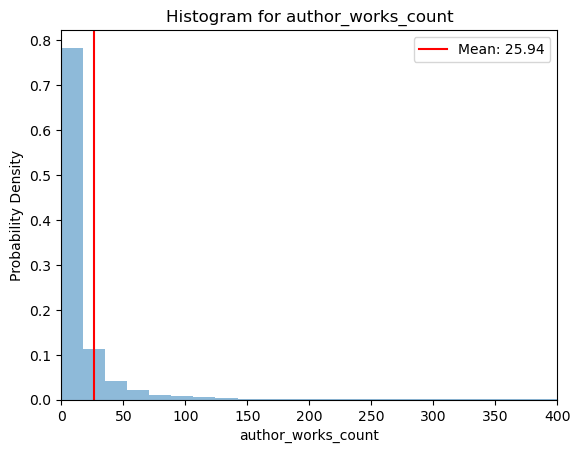

In [39]:
sns.histplot(authors_df[['works_count']], bins= 100000, stat = 'probability')
plt.xlabel('author_works_count')
plt.ylabel('Probability Density')
plt.xlim(0,400)
plt.title('Histogram for author_works_count')

mean = authors_df['works_count'].mean()
plt.axvline(x = mean, color = 'red', label = f'Mean: {mean:.2f}')
plt.legend()

plt.show()

##### fans_count

In [40]:
authors_df[['fans_count']].describe()

,fans_count
count,351767.000000
mean,111.615731
std,2661.018139
min,-33.000000
25%,1.000000
50%,4.000000
75%,20.000000
max,766035.000000


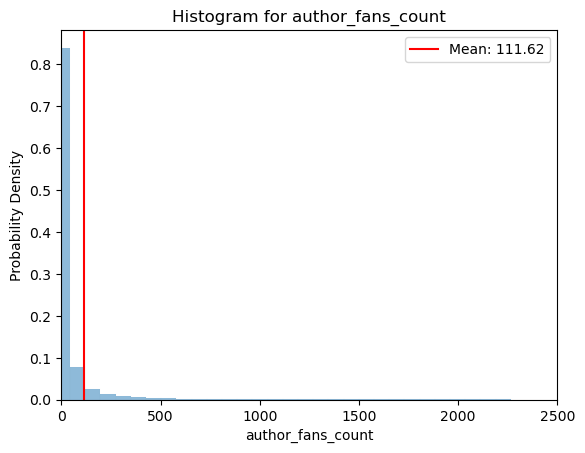

In [41]:
sns.histplot(authors_df[['fans_count']], bins= 10000, stat = 'probability')
plt.xlabel('author_fans_count')
plt.ylabel('Probability Density')
plt.xlim(0,2500)
plt.title('Histogram for author_fans_count')

mean = authors_df['fans_count'].mean()
plt.axvline(x = mean, color = 'red', label = f'Mean: {mean:.2f}')
plt.legend()

plt.show()

reducing the categories on the x-axis by aggregating the number of fans in intervals of 25'000 each

<Axes: >

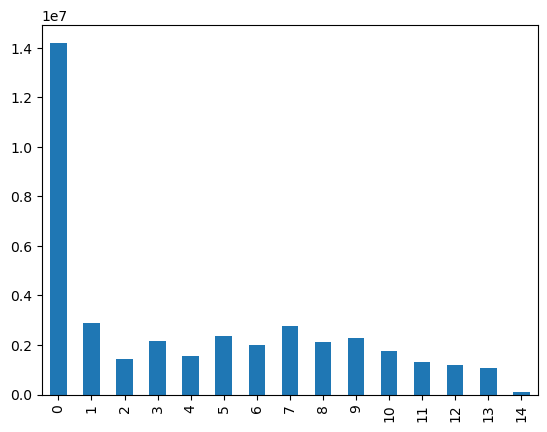

In [42]:
agg_count = authors_df['fans_count'].groupby(authors_df['fans_count'].index // 25000).sum()
agg_count.plot(kind = 'bar')

#### Univariate analysis of some columns from lighter books

##### average_rating

In [43]:
# Create a DataFrame with a single column 'average_rating'
books_avg_ratings = pd.DataFrame({'average_rating': booksDf['average_rating']})


In [44]:
books_avg_ratings.describe()

,average_rating
count,99984.000000
mean,3.827090
std,0.692622
min,0.000000
25%,3.710000
50%,3.930000
75%,4.130000
max,5.000000


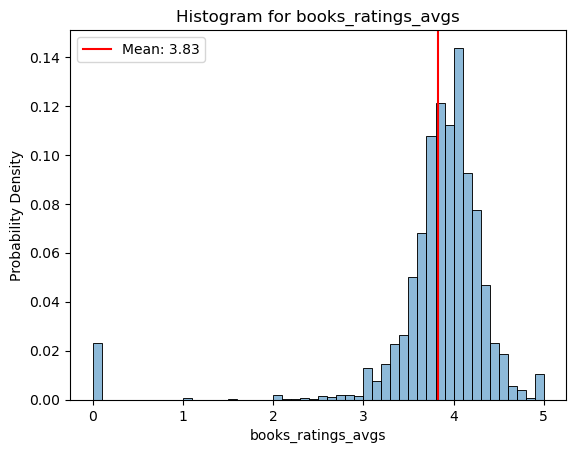

In [45]:
sns.histplot(books_avg_ratings, bins=50, stat='probability')
plt.xlabel('books_ratings_avgs')
plt.ylabel('Probability Density')
plt.title('Histogram for books_ratings_avgs')

mean = books_avg_ratings.mean()['average_rating']
label = 'Mean: {:.2f}'.format(mean)
plt.axvline(x=mean, color='red', label=label)
plt.legend()

plt.show()


##### ratings_count

In [46]:
books_ratings_count = booksDf[['ratings_count']]


In [47]:
books_ratings_count.describe()

,ratings_count
count,9.998400e+04
mean,4.522036e+04
std,2.658542e+05
min,0.000000e+00
25%,5.800000e+01
50%,5.910000e+02
75%,5.843000e+03
max,7.377351e+06


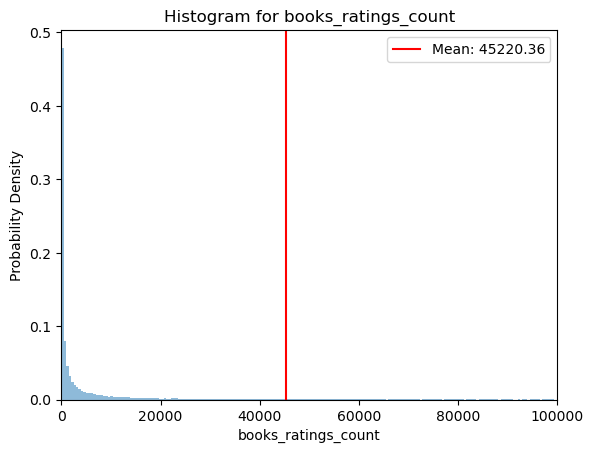

In [48]:
sns.histplot(books_ratings_count, bins= 15000, stat = 'probability')
plt.xlabel('books_ratings_count')
plt.ylabel('Probability Density')
plt.xlim(0,100000)
plt.title('Histogram for books_ratings_count')

mean = books_ratings_count.mean()['ratings_count']
plt.axvline(x = mean, color = 'red', label = f'Mean: {mean:.2f}')
plt.legend()

plt.show()

##### num_pages

In [49]:
books_num_pages = booksDf[['num_pages']]


In [50]:
books_num_pages.describe()

,num_pages
count,99984
unique,1429
top,
freq,24060


<Axes: >

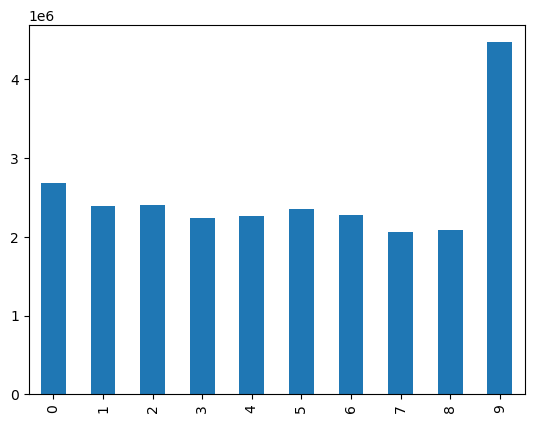

In [51]:
books_num_pages['num_pages'] = pd.to_numeric(books_num_pages['num_pages'], errors='coerce')
agg_count = books_num_pages['num_pages'].groupby(books_num_pages.index // 10000).sum()
agg_count.plot(kind='bar')


##### text_reviews_count

In [52]:
# Create a DataFrame for 'text_reviews_count'
books_text_reviews_count = pd.DataFrame({'text_reviews_count': booksDf['text_reviews_count']})


In [53]:
books_text_reviews_count.describe()

,text_reviews_count
count,99984.000000
mean,1253.207613
std,5678.835099
min,0.000000
25%,5.000000
50%,41.000000
75%,302.000000
max,116930.000000


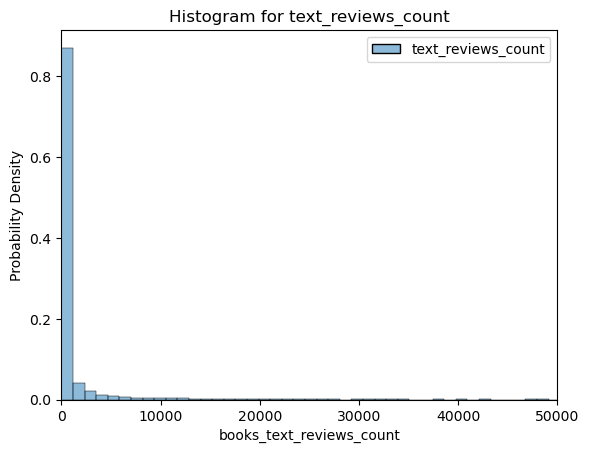

In [54]:
sns.histplot(books_text_reviews_count, bins= 100, stat = 'probability')
plt.xlabel('books_text_reviews_count')
plt.ylabel('Probability Density')
plt.xlim(0,50000)
plt.title('Histogram for text_reviews_count')

plt.show()

(0.0, 10000.0)

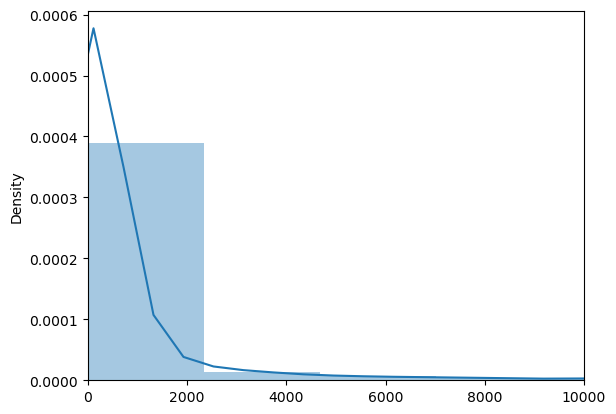

In [55]:
sns.distplot(books_text_reviews_count)
plt.xlim(0,10000)

# [RQ2]

Let’s finally dig into this vast dataset, retrieving some vital information:

1. Plot the number of books for each author in descending order.
2. Which book has the highest number of reviews?
3. Which are the top ten and ten worst books concerning the average score?
4. Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.
5. How many books have more than 250 pages?
6. Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).


In [56]:
filtered_data

,title,author_name,author_id,work_id,language,average_rating,ratings_count,text_reviews_count,publication_date,original_publication_date,num_pages,series_id
0,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,1077326,2809203,eng,4.50,2628006,44716,2004-09,2003-06-21,870,45175
1,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,1077326,4640799,eng,4.48,7377351,116930,2003-11-01,1997-06-26,309,45175
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,1077326,6231171,eng,4.43,2855044,55286,2003-11-01,1998-07-02,352,45175
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,1077326,2402163,eng,4.57,2946694,58023,2004-05-01,1999-07-08,435,45175
4,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,1077326,3046572,eng,4.56,2705676,48637,2002-09-28,2000-07-08,734,45175
...,...,...,...,...,...,...,...,...,...,...,...,...
99979,Total Workday Control Using Microsoft Outlook,Michael Linenberger,104978,13731267,,4.04,618,43,2005-10-20,2005-10-20,289,
99980,Desata Tu Poder Ilimitado!,Anthony Robbins,5627,20409653,,4.25,65,6,2001-04-01,1997-01-01,450,
99981,Poder Sin Limites: La Nueva Ciencia del Desarr...,Anthony Robbins,5627,165637,spa,4.23,29891,679,2006-04-28,1986,393,
99982,Introduction To Anthony Robbins Personal Power II,Anthony Robbins,5627,79231,,4.40,622,25,1997-01-28,1996,4,


In [57]:
authors_list = filtered_data['author_id'].tolist()
author_frequencies = Counter(authors_list)
one = pd.DataFrame(list(author_frequencies.items()), columns=['Author', 'Books'])
sorted_one = one.sort_values(by='Books',ascending=False)
only100 = sorted_one.head(100)

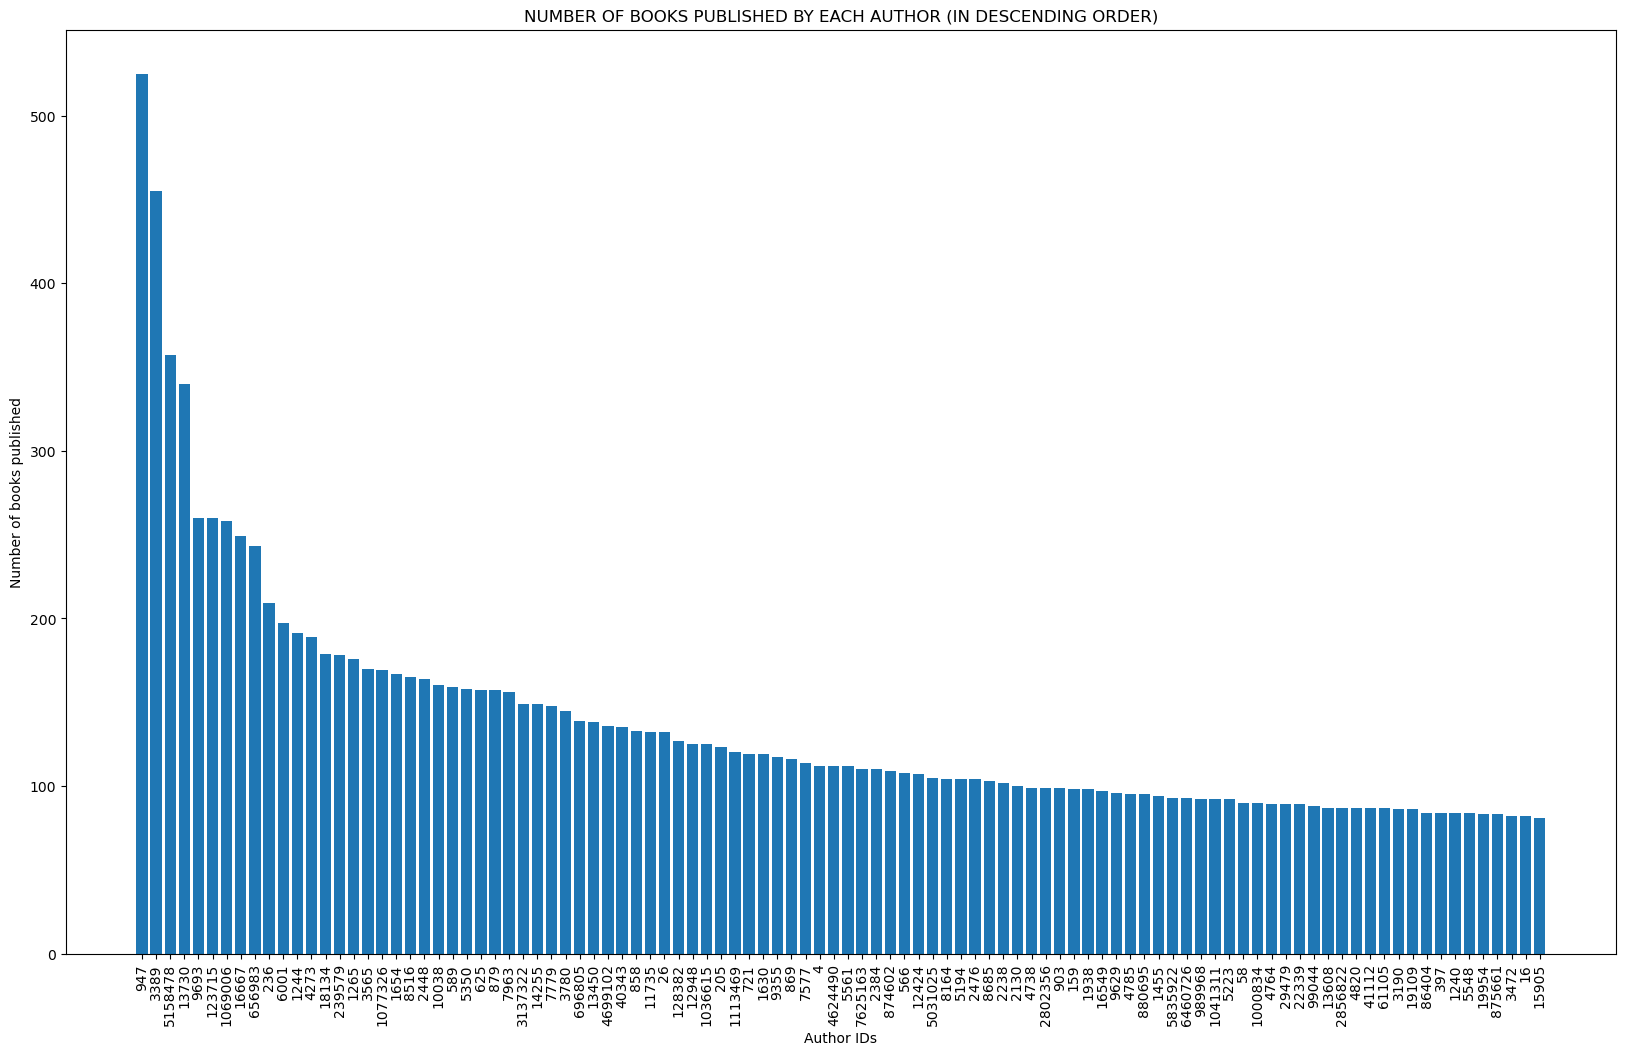

In [58]:
exaxis = only100['Author'].tolist()
ex = [str(number) for number in exaxis]
whyaxis = only100['Books'].tolist()

plt.figure(figsize=(20,12))
plt.bar(ex, whyaxis)
plt.xlabel('Author IDs')
plt.ylabel('Number of books published')
plt.title('NUMBER OF BOOKS PUBLISHED BY EACH AUTHOR (IN DESCENDING ORDER)')
plt.xticks(rotation=90)
plt.show()

### 2.2

In [59]:
highest_reviews = filtered_data['text_reviews_count'].max()
highest_reviews_book = filtered_data.loc[filtered_data['text_reviews_count'] == highest_reviews, 'title'].values[0]
print(f'The book with the highest number of reviews is {highest_reviews_book} with a review count of {highest_reviews}')

The book with the highest number of reviews is Harry Potter and the Sorcerer's Stone (Harry Potter, #1) with a review count of 116930


### 2.3

In [60]:
sorted_df = filtered_data.sort_values(by='average_rating',ascending=True)

top_10 = sorted_df.head(10)
bottom_10 = sorted_df.tail(10)

print("The top 10 books with the lowest average scores are:")
for index,row in top_10.iterrows():
    print(row['title'] + ": " + str(row['average_rating']))

print('-----------------------------------------------------------')

print("The 10 books with the highest average scores are:")
for index, row in bottom_10.iterrows():
    print(row['title'] + ": " + str(row['average_rating']))

The top 10 books with the lowest average scores are:
Drôles De Zèbres: 0.0
Black People in the Bible: 0.0
Russia Revised: Alphabetical Key To The Soviet Debacle And The New Republics: 0.0
La villa santiaguista de Liétor en la Baja Edad Media: 0.0
Learning A Second Language Through Interaction: 0.0
The Numerical Solution of Ordinary and Partial Differential Equations: 0.0
Clarice Lispector: A Bio-Bibliography: 0.0
Clarice Lispector: 0.0
Getting Along with Your Friends: 0.0
Puedo Ser Jugador de Beisbol: I Can Be a Baseball Player: 0.0
-----------------------------------------------------------
The 10 books with the highest average scores are:
Kandinsky Poster Book: 5.0
Staying Put!: The Art of Anchoring: 5.0
Harry Rowohlt liest Flann O'Brien: 5.0
Poemas : Voz Del Autor: 5.0
Relocating to Los Angeles and Orange County: Everything You Need to Know Before You Move and After You Get There! (Relocating): 5.0
Selected Writings of Sir Walter Scott: 5.0
Misterios del Mar Oceano: 5.0
René Magritt

### 2.4

In [61]:
df = filtered_data
language_clean = df[(df['language'].str.strip() != '')]
languages = language_clean['language'].tolist()
element_count = Counter(languages)
lang = pd.DataFrame(list(element_count.items()), columns=['Language', 'Books'])
lang2 = pd.DataFrame(list(element_count.items()), columns=['Language', 'Books'])

In [62]:
import re
pattern = r"en-.{2}"
count=0
c1 =0
for index, row in lang.iterrows():
    if re.match(pattern, row['Language']):
        c1+=1
        count=count+row['Books']
        lang = lang.drop(index)
print(c1)
print(count)

lang.iloc[0,1]+=count

for index,rows in lang.iterrows():
    if rows['Language'] == '--':
        lang = lang.drop(index)

3
4931


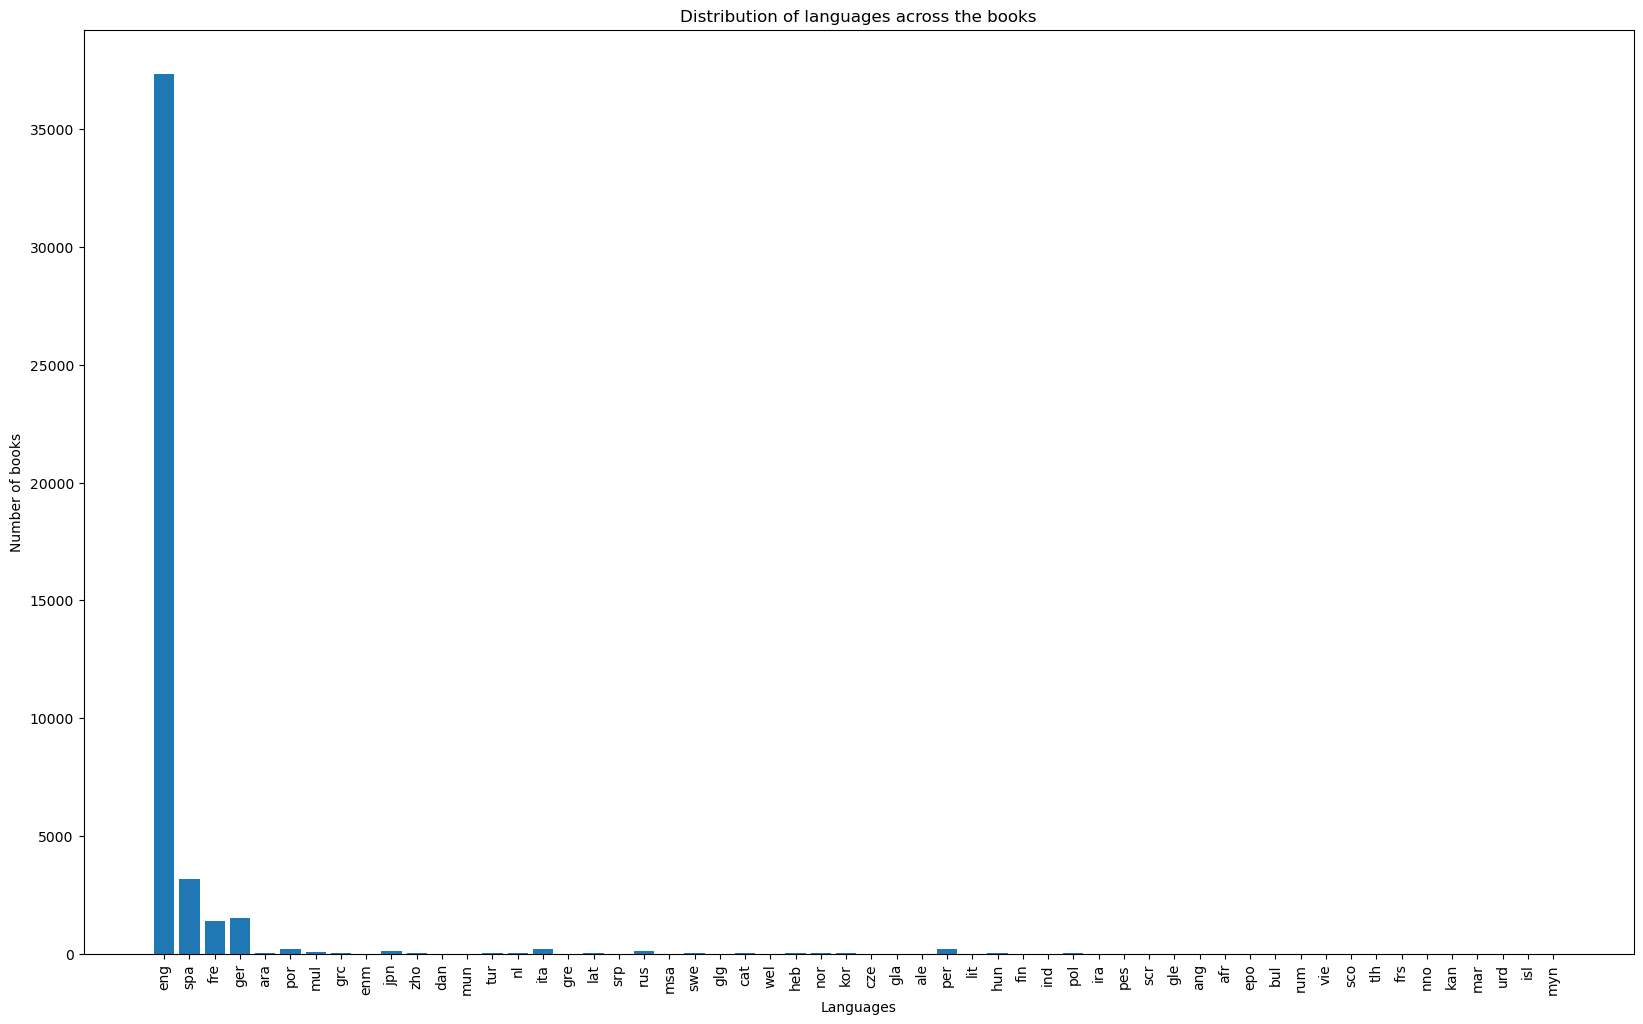

In [63]:
exaxis = lang['Language'].tolist()
x1axis = exaxis[:100]
whyaxis = lang['Books'].tolist()
y1axis = whyaxis[:100]

plt.figure(figsize=(20,12))
plt.bar(x1axis, y1axis)
plt.xlabel('Languages')
plt.ylabel('Number of books')
plt.title('Distribution of languages across the books')
plt.xticks(rotation=90)
plt.show()

###2.5

In [64]:
large_books = 0
for i in df['num_pages']:
    try:
        num_pages = int(i)
        if num_pages > 250:
            large_books += 1
    except (ValueError, TypeError):
        pass
print("The number of books containing more than 250 pages are:", large_books)

The number of books containing more than 250 pages are: 41504


### 2.6

In [65]:
authors = adf

In [66]:
fancount=[]
p = sorted_one.head(50)
prolific50 = p['Author'].tolist()

for index, row in authors.iterrows():
    if row['id'] in prolific50:
        fancount.append(row['fans_count'])

print(fancount[:50])

[19826, 6444, 7917, 1056, 17290, 41402, 50170, 2152, 4936, 5368, 36816, 15525, 50591, 19301, 35674, 19044, 766035, 27469, 317040, 21278, 8886, 2651, 21570, 8463, 5496, 3667, 29118, 1416, 613, 1545, 1395, 30064, 12778, 10147, 19729, 383, 357, 44456, 18782, 23779, 59406, 8840, 13124, 34822, 213208, 13137, 37150, 20867, 1067, 2456]


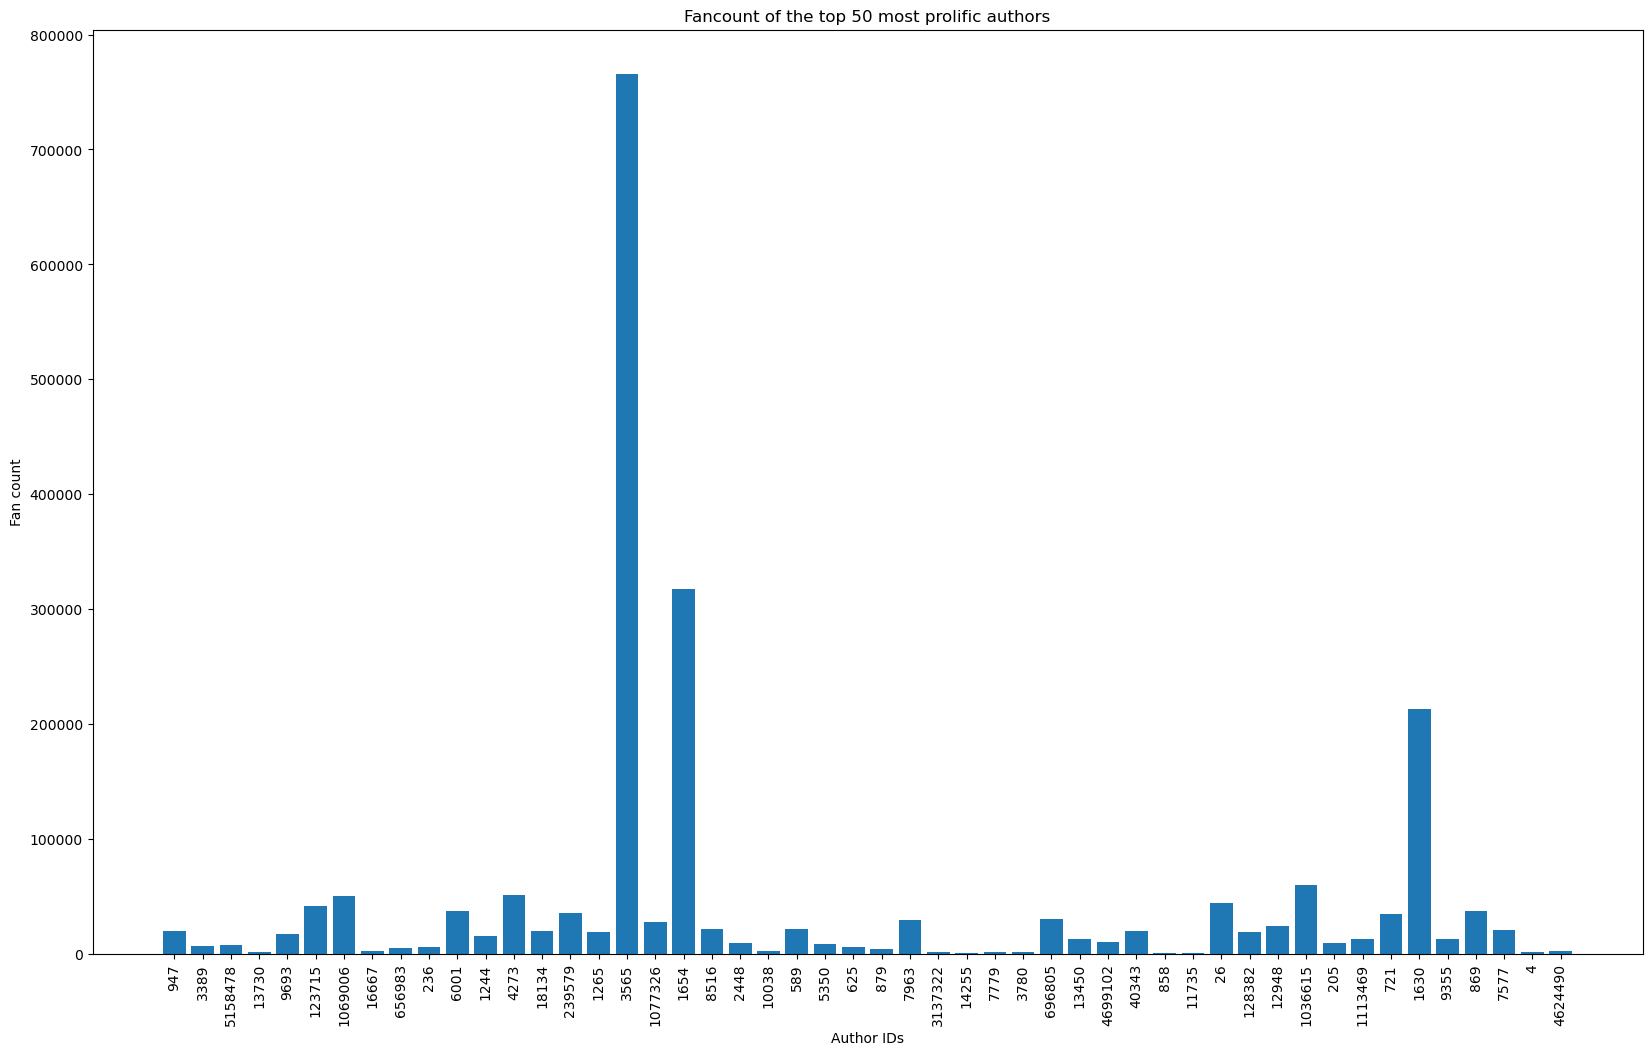

In [67]:
p50 = [str(number) for number in prolific50]

plt.figure(figsize=(20, 12))
plt.bar(p50,fancount)
plt.xlabel('Author IDs')
plt.ylabel('Fan count')
plt.title("Fancount of the top 50 most prolific authors")
plt.xticks(rotation=90)
plt.show()

# [RQ3]
Let’s have a historical look at the dataset!

Write a function that takes as input a year and returns as output the following information:

1.   The number of books published that year.
2.   The total number of pages written that year.
3. The most prolific month of that year.
4. The longest book written that year.

In [68]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Loading a chunck of 10 thousand rows to have information of the data in the dataset

In [69]:
booksDf_org.head()

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description
0,2,Harry Potter and the Order of the Phoenix (Har...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2809203,0439358078,9780439358071,,eng,...,Paperback,US Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,870,45175,Harry Potter,5,"[{'name': 'to-read', 'count': 324191}, {'name'...",There is a door at the end of a silent corrido...
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,4640799,,,,eng,...,Hardcover,Library Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc,309,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63540}, {'name':...",Harry Potter's life is miserable. His parents ...
2,4,Harry Potter and the Chamber of Secrets (Harry...,None,J.K. Rowling,1077326,6231171,0439554896,9780439554893,,eng,...,Hardcover,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,352,45175,Harry Potter,2,"[{'name': 'to-read', 'count': 282341}, {'name'...",The Dursleys were so mean and hideous that sum...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2402163,043965548X,9780439655484,,eng,...,Mass Market Paperback,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,435,45175,Harry Potter,3,"[{'name': 'to-read', 'count': 292815}, {'name'...","For twelve long years, the dread fortress of A..."
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,3046572,,,,eng,...,Paperback,First Scholastic Trade Paperback Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,734,45175,Harry Potter,4,"[{'name': 'to-read', 'count': 287086}, {'name'...",Harry Potter is midway through his training as...


In [70]:
booksDf_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99984 entries, 0 to 99983
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         99984 non-null  int64  
 1   title                      99984 non-null  object 
 2   authors                    34259 non-null  object 
 3   author_name                99984 non-null  object 
 4   author_id                  99984 non-null  int64  
 5   work_id                    99984 non-null  int64  
 6   isbn                       99984 non-null  object 
 7   isbn13                     99984 non-null  object 
 8   asin                       99984 non-null  object 
 9   language                   99984 non-null  object 
 10  average_rating             99984 non-null  float64
 11  rating_dist                99984 non-null  object 
 12  ratings_count              99984 non-null  int64  
 13  text_reviews_count         99984 non-null  int

In [71]:
columns = ['title', 'author_name', 'language', 'average_rating', 'publication_date', 'num_pages', 'original_publication_date', 'author_id']
booksDfcleaned = booksDf_org[columns]
booksDf = booksDfcleaned

In [72]:
booksDf.head()

,title,author_name,language,average_rating,publication_date,num_pages,original_publication_date,author_id
0,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,eng,4.50,2004-09,870,2003-06-21,1077326
1,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,eng,4.48,2003-11-01,309,1997-06-26,1077326
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,eng,4.43,2003-11-01,352,1998-07-02,1077326
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,eng,4.57,2004-05-01,435,1999-07-08,1077326
4,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,eng,4.56,2002-09-28,734,2000-07-08,1077326


In [73]:
def historical_look(year):
    yearDf = booksDf[booksDf['original_publication_date'].str[:4].astype(int) == year]

    # The number of books published that year
    totalBooks = yearDf.shape[0]

    # The total number of pages written that year
    # Replace empty strings with a default value (0) and then convert to integers
    yearDf.num_pages= yearDf.num_pages.replace('', '0').astype(int)
    totalPages = yearDf.num_pages.sum()

    # The most prolific month of that year
    df_months = yearDf.original_publication_date.str[5:7].astype(int)
    monthCount = df_months.value_counts() #counting no. of months
    maxOccurance = monthCount.max()
    prolificMonth = monthCount[monthCount == maxOccurance]
    prolificMonth = prolificMonth.index.values.tolist()

    # The longest book written that year
    maxPages = yearDf.num_pages.max()
    longestBook = yearDf[yearDf['num_pages'] == maxPages]['title'].values[0]

    return totalBooks, totalPages, prolificMonth, longestBook

In [74]:
date_pattern = r'^\d{4}-\d{2}-\d{2}$'
booksDf = booksDf[booksDf['original_publication_date'].str.match(date_pattern, na=False)]
booksDf.original_publication_date.replace('', '0', inplace = True)
booksDf['publication_year'] = booksDf.original_publication_date.str[:4].astype(int)


In [75]:
booksDf

,title,author_name,language,average_rating,publication_date,num_pages,original_publication_date,author_id,publication_year
0,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,eng,4.50,2004-09,870,2003-06-21,1077326,2003
1,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,eng,4.48,2003-11-01,309,1997-06-26,1077326,1997
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,eng,4.43,2003-11-01,352,1998-07-02,1077326,1998
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,eng,4.57,2004-05-01,435,1999-07-08,1077326,1999
4,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,eng,4.56,2002-09-28,734,2000-07-08,1077326,2000
...,...,...,...,...,...,...,...,...,...
99977,Awaken the Giant Within: How to Take Immediate...,Tony Robbins,eng,4.15,1992-11-01,544,1992-01-01,14545796,1992
99978,The Anger Control Workbook,Matthew McKay,eng,4.02,2000-11-08,208,2000-01-01,98986,2000
99979,Total Workday Control Using Microsoft Outlook,Michael Linenberger,,4.04,2005-10-20,289,2005-10-20,104978,2005
99980,Desata Tu Poder Ilimitado!,Anthony Robbins,,4.25,2001-04-01,450,1997-01-01,5627,1997


Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.

In [76]:
# Dataframe with yearwise totalBooks, totalPages, prolificMonth, longestBook
columns = ['totalBooks', 'totalPages', 'prolificMonth', 'longestBook']
uniqueYears = booksDf.publication_year.unique().tolist()
yearwiseList = list(map(historical_look, uniqueYears))
yearwiseDf = pd.DataFrame(yearwiseList, columns=columns)
yearwiseDf['year'] = uniqueYears

In [77]:
print('Yearwise Dataframe head: ')
yearwiseDf.head(10)

Yearwise Dataframe head: 


,totalBooks,totalPages,prolificMonth,longestBook,year
0,2618,657498,[1],"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",2003
1,1471,2597323,[1],Sholokhov's Tikhii Don: A Commentary In Two Vo...,1997
2,1664,400926,[1],"Harper American Literature, Single Volume Edition",1998
3,1860,430482,[1],Cecil Textbook of Medicine: Single Volume,1999
4,2062,515958,[1],The History of Middle Earth: Part Two,2000
5,3153,780350,[1],"Harry Potter Collection (Harry Potter, #1-6)",2005
6,254,64737,[1],The Norton Anthology of American Literature,1979
7,1324,308224,[1],The Quantum Theory of Fields 3 Volume Set,1996
8,710,167476,[1],Introduction to Algorithms,1989
9,1148,257359,[1],Ryrie Study Bible Expanded Edition New America...,1995


In [78]:
print('Yearwise Dataframe tail: ')
yearwiseDf.tail(10)

Yearwise Dataframe tail: 


,totalBooks,totalPages,prolificMonth,longestBook,year
229,1,124,[1],The History of the Reign of King Henry VII,1622
230,1,124,[9],The Gold Bug,1842
231,1,0,[1],Matthew Henry Concise Commentary on the Whole ...,1710
232,4,1935,[1],"The Journey to the West, Volume 1 (Journey to ...",1592
233,7,2373,[1],"Select Works of Edmund Burke, Volume 2: Reflec...",1790
234,1,272,[1],Selected Poems,1860
235,1,0,[8],The Vampire In Europe,2017
236,1,128,[1],David Walker's Appeal,1829
237,1,352,[5],Three Major Plays,1740
238,1,348,[10],Martin Luther's Ninety-Five Theses,1517


### Using LLM

In [79]:
def historical_look_chatgpt(booksDf, year):
    # Convert year to a string for comparison
    year_str = str(year)

    # Convert the 'publication_date' column to strings
    booksDf['publication_date'] = booksDf['publication_date'].astype(str)

    # Filter the DataFrame to include only rows from the specified year
    year_books = booksDf[booksDf['publication_date'].str.startswith(year_str, na=False)]

    # Number of books published that year
    num_books = len(year_books)

    # Clean the 'num_pages' column - remove non-numeric characters
    year_books['num_pages'] = year_books['num_pages'].astype(str).str.replace(r'\D', '', regex=True)

    # Filter out rows with empty or invalid 'num_pages' values
    year_books = year_books[year_books['num_pages'].str.isnumeric()]
    year_books['num_pages'] = pd.to_numeric(year_books['num_pages'])

    # Check if there's data for the year
    if year_books.empty:
        return {
            "num_books_published": 0,
            "total_pages_written": 0,
            "most_prolific_month": None,
            "longest_book": None
        }

    # Total number of pages written that year
    total_pages = year_books['num_pages'].sum()

    # Find the most prolific month of that year, or None if there's no data
    prolific_month = year_books['publication_month'].value_counts().idxmax() if 'publication_month' in year_books else None

    # Find the longest book written that year, or None if there's no data
    longest_book = year_books.loc[year_books['num_pages'].idxmax()].to_dict() if not year_books.empty else None

    return {
        "num_books_published": num_books,
        "total_pages_written": total_pages,
        "most_prolific_month": prolific_month,
        "longest_book": longest_book['title'] if longest_book else None
    }


In [80]:
# Assuming booksDf is your DataFrame
year = 2004  # Replace with the desired year
result = historical_look_chatgpt(booksDf, year)
print(result)

{'num_books_published': 3287, 'total_pages_written': 890831, 'most_prolific_month': None, 'longest_book': 'Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)'}


In [81]:
import pandas as pd

# Assuming you have the original booksDf DataFrame

# Define a list of years for which you want to compute the information
years_to_analyze = range(2003, 2023)  # Adjust the range as needed

# Initialize an empty list to store the data for each year
data_for_each_year = []

# Compute the information for each year and store it in the list
for year in years_to_analyze:
    result = historical_look_chatgpt(booksDf, year)
    data_for_each_year.append(result)

# Create a new DataFrame from the list
yearly_info_df = pd.DataFrame(data_for_each_year, index=years_to_analyze)

In [82]:
print("Head of the DataFrame (First Ten Years):\n")
yearly_info_df.head(10)

Head of the DataFrame (First Ten Years):



,num_books_published,total_pages_written,most_prolific_month,longest_book
2003,2796,783720,None,The Letters of D. H. Lawrence 8 Volume Set
2004,3287,890831,None,"Harry Potter Boxed Set, Books 1-5 (Harry Potte..."
2005,4175,1148390,None,"Harry Potter Collection (Harry Potter, #1-6)"
2006,5123,1441142,None,Collected Works of John Stuart Mill (8 Volumes)
2007,2266,639703,None,The Norton Anthology of American Literature
2008,213,55854,None,Hebrew-Greek Key Word Study Bible: New America...
2009,120,34081,None,The Mystical City of God (4 Volume Set)
2010,110,32258,None,Bone: The Complete Edition
2011,80,20015,None,George Washington's Sacred Fire
2012,67,18912,None,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...


In [83]:
print("\nTail of the DataFrame (Last Ten Years):\n")
yearly_info_df.tail(10)


Tail of the DataFrame (Last Ten Years):



,num_books_published,total_pages_written,most_prolific_month,longest_book
2013,39,10901,None,"Chess: 5334 Problems, Combinations and Games"
2014,16,3688,None,"Business Cycles: A Theoretical, Historical, an..."
2015,35,7473,None,The Valley Of Decision
2016,20,7203,None,It (Eso)
2017,18,4933,None,New and Collected Poems: 1931-2001
2018,22,3161,None,Witness
2019,11,1959,None,The Blue Bistro
2020,7,3038,None,"Methods of Soil Analysis, Part 2: Microbiologi..."
2021,0,0,None,None
2022,0,0,None,None


ChatGPT took the maximum year and minimum year and added the missing years as well as can be seen in the last 10 years dataframe.Also, difference between mine and ChatGPT's code is the efficiency. It used more precised code.

# [RQ4]
Quirks questions about consistency. In most cases, we will not have a consistent dataset, and the one we are dealing with is no exception. So, let's enhance our analysis.

In [84]:
authorsDf.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064.0,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316.0,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159.0,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302.0,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979.0,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?


In [85]:
epoNum = len(authorsDf.name) - len(authorsDf.name.unique())
print("Number of eponymous names: "+ str(epoNum))

Number of eponymous names: 37


In [86]:
eponymousNames = authorsDf[authorsDf.duplicated(subset='name')]['name'].unique()
eNames = []
for name in eponymousNames:
    eNames.append(name)
print(str(eponymousNames) +' Eponymous author names:\n')
print(eNames)

['Peter  Marshall' 'Hildegard von Bingen' 'George  Franklin' 'محمد نجيب'
 'Peter King' 'Paul Graham' 'John  Mole' 'Chris Lynch' 'Caroline Miller'
 'Paul      Davies' 'David Yates' 'James Kent' 'Jorge Molina'
 'Joseph Fink' 'Julie  Campbell' 'Jackson Butch Guice' 'Q. Hayashida'
 'Mike   Lee' 'Christopher Phillips' 'Robert W. Sullivan IV'
 'Yordan Yovkov' 'Catherine   Jones' 'Martin    Shaw' 'David  Nelson'
 'Peter      Marshall' 'Katherine Mercurio Gotthardt' 'M.K. Graff' '小野不由美'
 'Boris Zakhoder' 'Peter Green' 'Peter    Green' 'William Messner-Loebs'
 'Peter  Davies' 'Dimitar Dimov' 'James C.L. Carson' 'Cicerón'
 'Erin  Bedford'] Eponymous author names:

['Peter  Marshall', 'Hildegard von Bingen', 'George  Franklin', 'محمد نجيب', 'Peter King', 'Paul Graham', 'John  Mole', 'Chris Lynch', 'Caroline Miller', 'Paul      Davies', 'David Yates', 'James Kent', 'Jorge Molina', 'Joseph Fink', 'Julie  Campbell', 'Jackson Butch Guice', 'Q. Hayashida', 'Mike   Lee', 'Christopher Phillips', 'Robert

Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.


In [87]:
def authorBooks(author_id):
    joinedDf = authorsDf.merge(booksDf, left_on='id', right_on='author_id', how='inner')
    authorBookdict = {}
    for id_ in author_id:
        authorBookdict[id_] = list(joinedDf[joinedDf['id'] == id_]['title'])
    return authorBookdict

In [88]:
# checking
author_id = [4, 7, 10, 20]
authorBooks(author_id)

{4: ["The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1)",
  "The Ultimate Hitchhiker's Guide: Five Complete Novels and One Story (Hitchhiker's Guide to the Galaxy, #1-5)",
  "The Ultimate Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1-5)",
  "The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1)",
  "The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1)",
  "The Hitchhiker's Guide to the Galaxy: Quandary Phase (Hitchhiker's Guide: Radio Play, #4)",
  "The Ultimate Hitchhiker's Guide (Hitchhiker's Guide to the Galaxy, #1-5)",
  "The Hitchhiker's Guide to the Galaxy: Quintessential Phase (Hitchhiker's Guide: Radio Play, #5)",
  'The Long Dark Tea-Time of the Soul (Dirk Gently, #2)',
  "Dirk Gently's Holistic Detective Agency (Dirk Gently, #1)",
  'The Salmon of Doubt (Dirk Gently, #3)',
  "Mostly Harmless (Hitchhiker's Guide to the Galaxy, #5)",
  "Life, the Universe and Everything (Hitchhiker's

What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?


In [89]:
joinedDf = authorsDf.merge(booksDf, left_on='id', right_on='author_id', how='inner', suffixes=('_auth', '_book'))
joinedDf.head()

,ratings_count,average_rating_auth,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,...,fans_count,title,author_name,language,average_rating_book,publication_date,num_pages,original_publication_date,author_id,publication_year
0,2862064.0,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,...,19826,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,eng,4.22,2005,216,1979-10-12,4,1979
1,2862064.0,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,...,19826,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,eng,4.36,2005-11-01,815,1996-01-17,4,1996
2,2862064.0,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,...,19826,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,eng,4.36,2002-04-28,815,1996-01-17,4,1996
3,2862064.0,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,...,19826,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,eng,4.22,2004-08-03,215,1979-10-12,4,1979
4,2862064.0,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,...,19826,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,eng,4.22,2005-03-23,6,1979-10-12,4,1979


Given the joined dataset has 2 columns that are named as average ratings, I am going with the one that came from the books dataset i.e average_rating_book


In [90]:
joinedDfsort = joinedDf.sort_values(by = 'average_rating_book', ascending = False).reset_index()
joinedDfsort.head(20) # Top 20 authors

,index,ratings_count,average_rating_auth,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,...,fans_count,title,author_name,language,average_rating_book,publication_date,num_pages,original_publication_date,author_id,publication_year
0,34149,5675.0,4.13,337,"[108338, 385732, 488107, 108340, 1471267, 1084...","[112519, 396245, 499994, 149420, 1480197, 1126...",93,81372,Swami Rama,male,...,129,The Valmiki Ramayana: Retold in Verse,Swami Rama,,5.0,,,1993-01-01,81372,1993
1,16495,287.0,4.09,41,"[70169097, 26785904, 6771395, 5189681, 1341982...","[45420493, 18843247, 6577978, 5122890, 8551744...",39,13155,Ross Garnaut,other,...,7,Taxation of Mineral Rents,Ross Garnaut,eng,5.0,1983-11-17,350,1983-11-17,13155,1983
2,35094,11962.0,4.06,731,"[148752, 630641, 148754, 313648, 42999483, 145...","[154126, 644478, 154128, 322939, 23434088, 146...",89,89095,Jawaharlal Nehru,male,...,317,"Selected Works of Jawaharlal Nehru, 2nd Series...",Jawaharlal Nehru,,5.0,2006-01-01,655,2006-01-06,89095,2006
3,2482,2444747.0,3.87,50703,"[1835605, 41326609, 2071994, 2621763, 41261371...","[2956, 24583, 62446, 162898, 24580, 682793, 10...",3891,1244,Mark Twain,male,...,15525,The Complete Interviews (American Literary Rea...,Mark Twain,en-US,5.0,2006-10-22,768,2006-10-22,1244,2006
4,41805,27612.0,3.77,4418,"[3159101, 169227, 9202978, 376784, 6598057, 45...","[3127736, 175176, 7375409, 387147, 5975578, 25...",156,5716305,Tahar Ben Jelloun,male,...,1927,Coffret Tahar Ben Jelloun: L'Ange aveugle - Jo...,Tahar Ben Jelloun,fre,5.0,,508,1996-09-02,5716305,1996
5,25039,6056.0,3.64,1040,"[1609642, 637325, 3518135, 42499050, 24075955,...","[1143788, 140314, 3476806, 22929498, 17340369,...",32,32811,Pierre Bayard,male,...,79,Il Était Deux Fois Romain Gary,Pierre Bayard,,5.0,,,1990-03-01,32811,1990
6,41856,10048.0,4.29,557,"[1094004, 6965560, 2955838, 19179956, 21363985...","[626685, 6766797, 1269011, 13591873, 15703129,...",307,5786093,Marina Tsvetaeva,female,...,394,Le Poème De La Fin,Marina Tsvetaeva,,5.0,,,2000-01-01,5786093,2000
7,25109,14755.0,4.00,570,"[57016, 21400684, 6824840, 14292186, 912568, 1...","[58547, 15724788, 6630485, 9408163, 927567, 10...",82,33041,Kurt Cobain,male,...,640,Nirvana Drum Collection,Kurt Cobain,,5.0,2000-09-01,88,2000-09-01,33041,2000
8,3512,20213.0,3.69,1890,"[890040, 2130894, 899700, 377533, 58228127, 87...","[904892, 2125454, 914617, 387904, 36508557, 88...",70,1843,Helen Cooper,female,...,94,Three Women and a Piano Tuner,Helen Cooper,,5.0,2005-04-01,96,2005-04-01,1843,2005
9,25264,3613.0,3.84,432,"[42498438, 133835, 6366639, 57937, 69008, 2047...","[22928858, 138848, 40718609, 59519, 71256, 204...",38,33612,Frank McLynn,male,...,61,Carl Gustav Jung Part 1 Of 2,Frank McLynn,,5.0,,,1997-08-21,33612,1997


In [91]:
# top 20 authors df
top20auth = joinedDfsort[['title', 'name', 'average_rating_book']].head(20)
top20auth['title_length'] = list((top20auth.title).str.len())
top20auth = top20auth.sort_values(by = 'title_length', ascending = False).reset_index()
print('The longest book title is: '+ top20auth.title[0] +
      '\n of length: ' + str(top20auth.title_length[0]) +
      ' \n by author: ' + top20auth.name[0] +
      '\n with average rating: ' + str(top20auth.average_rating_book[0]))


The longest book title is: A Rose Garden: Selections from the Divan-I Kebir, Meter 1 / Mevlana Celaleddin Rumi; Translated by Nevit O. Ergin
 of length: 113 
 by author: Rumi
 with average rating: 5.0


What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.


In [92]:
joinedDf['title_length'] = list((joinedDf.title).str.len())
joinedDf = joinedDf.sort_values(by = 'title_length').reset_index()
print('The shortest book title is: '+ joinedDf.title[0] +
      '\n of length: ' + str(joinedDf.title_length[0]) +
      ' \n by author: ' + joinedDf.name[0] +
      '\n with average rating: ' + str(joinedDf.average_rating_book[0]))

The shortest book title is: a
 of length: 1 
 by author: Andy Warhol
 with average rating: 3.39


The strange thing is there is book that has just a letter as a title. In alternate way, I would rather exclude this title because it is maybe not complete and not meaningful.

# RQ5



### We can consider the authors with the most fans to be influential. Let’s have a deeper look.

##### Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?

In [93]:
# Load the "lighter_authors.json" dataset into a Pandas DataFrame


columns = ['name', "fans_count", "works_count"]
authorscleaned = df_authors_question_five[columns]


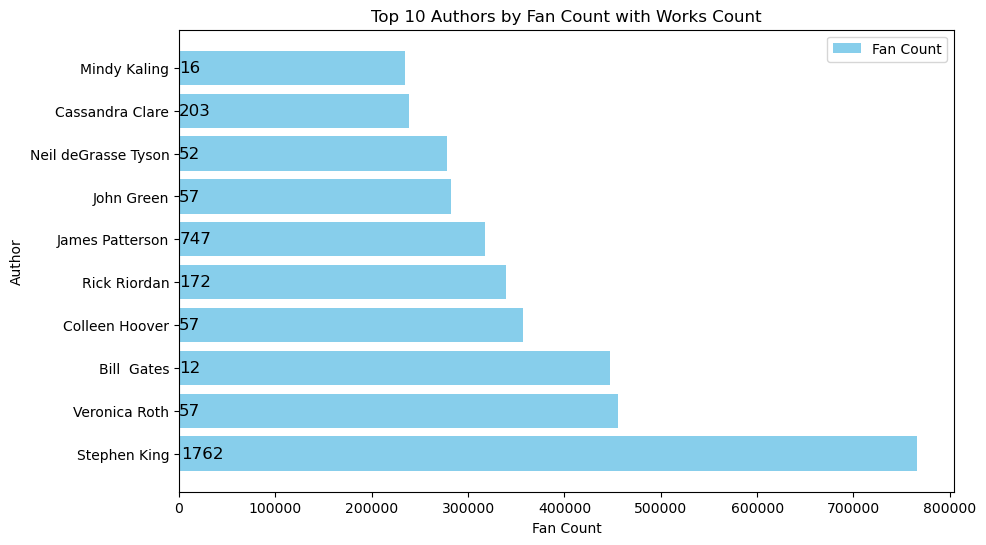

In [94]:


# Sort the DataFrame by "fans_count" in descending order
sorted_df = authorscleaned.sort_values(by="fans_count", ascending=False)

# Get the top 10 authors based on fan count
top_10_authors = sorted_df.head(10)

# Create a bar plot for the top 10 authors with fan count and works count
fig, ax = plt.subplots(figsize=(10, 6))

# Plot fan count
ax.barh(top_10_authors['name'], top_10_authors['fans_count'], color='skyblue', label='Fan Count')

# Plot works count next to fan count
for index, value in enumerate(top_10_authors['works_count']):
    ax.text(value, index, str(value), va='center', fontsize=12, color='black')

# Set labels and title
ax.set_xlabel('Fan Count')
ax.set_ylabel('Author')
ax.set_title('Top 10 Authors by Fan Count with Works Count')

# Show the plot
plt.legend(loc='upper right')
plt.show()


Most influential author is Stephen King.

### Have they published any series of books? If any, extract the longest series name among these authors.

In [95]:
# Load the "lighter_books.json" dataset
df_books_question_five = booksDf_org
# Sort the DataFrame by "fans_count" in descending order and select the top 10 authors
top_10_authors = df_authors_question_five.sort_values(by='fans_count', ascending=False).head(10)

# Initialize a dictionary to store author names and their longest series names
author_longest_series = {}

# Iterate through the top 10 authors
for index, row in top_10_authors.iterrows():
    author_name = row['name']
    author_id = row['id']

    # Filter the "df_books_question_five" to find all series names for the author
    series_names = df_books_question_five[df_books_question_five['author_id'] == author_id]['series_name'].values
    series_names = [name for name in series_names if name]  # Filter out empty series names

    # Find the longest series name for the author
    longest_series_name = max(series_names, key=len) if series_names else ""

    author_longest_series[author_name] = longest_series_name

# Create a DataFrame to display the longest series names for each author
longest_series_df = pd.DataFrame.from_dict(author_longest_series, orient='index', columns=['Longest Series Name'])

# Find the author with the longest series name
max_length = 0
longest_series_author = None
longest_series_name = None

for author, series_name in author_longest_series.items():
    if len(series_name) > max_length:
        max_length = len(series_name)
        longest_series_author = author
        longest_series_name = series_name

# Print the DataFrame and the author with the longest series name
print("Authors and Their Longest Series Names:")
print(longest_series_df)
print("\nAuthor with the Longest Series Name:")
print(f"Author: {longest_series_author}")
print(f"Longest Series Name: {longest_series_name}")


Authors and Their Longest Series Names:
                                 Longest Series Name
Stephen King              Pesadillas y alucinaciones
Veronica Roth                                       
Bill  Gates                                         
Colleen Hoover                                      
Rick Riordan         Percy Jackson and the Olympians
James Patterson                  Women's Murder Club
John Green                                          
Neil deGrasse Tyson                           Merlin
Cassandra Clare                                     
Mindy Kaling                                        

Author with the Longest Series Name:
Author: Rick Riordan
Longest Series Name: Percy Jackson and the Olympians


There are 5 authors in the 'Top 10 Authors' list who have a series. The longest series name among those series is 'Percy Jackson and the Olympians' (by Rick Riordan).

### How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.

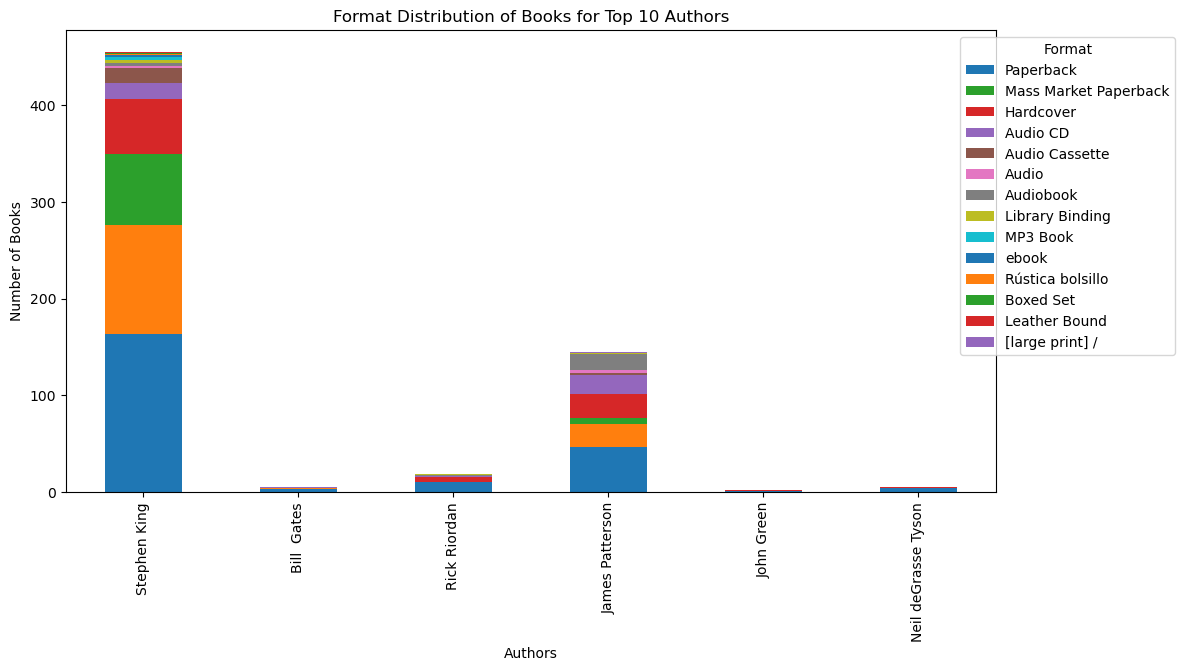

In [96]:
# Load the "lighter_books.json" dataset
df_books_question_five = booksDf_org

# Sort the DataFrame by "fans_count" in descending order and select the top 10 authors
top_10_authors = df_authors_question_five.sort_values(by='fans_count', ascending=False).head(10)

# Extract the author IDs of the top 10 authors
author_ids = top_10_authors['id']

# Initialize a dictionary to store format counts for each author
author_format_counts = {}

# Iterate through the top 10 authors
for author_id in author_ids:
    author_name = top_10_authors[top_10_authors['id'] == author_id]['name'].values[0]

    # Filter the "df_books_question_five" to find books by the author using author_id
    author_books = df_books_question_five[df_books_question_five['author_id'] == author_id]

    # Count the book formats for the author
    format_counts = author_books['format'].value_counts().to_dict()

    # Store the format counts in the dictionary
    author_format_counts[author_name] = format_counts

# Create a DataFrame from the author_format_counts
author_format_df = pd.DataFrame.from_dict(author_format_counts, orient='index').fillna(0)

# Plot a bar chart to show the format distribution for each author
ax = author_format_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Authors')
plt.ylabel('Number of Books')
plt.title('Format Distribution of Books for Top 10 Authors')
plt.legend(title='Format', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


All the authors in the 'Top 10 Authors' list have published in different formats as seen in the graph.

#####Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.”

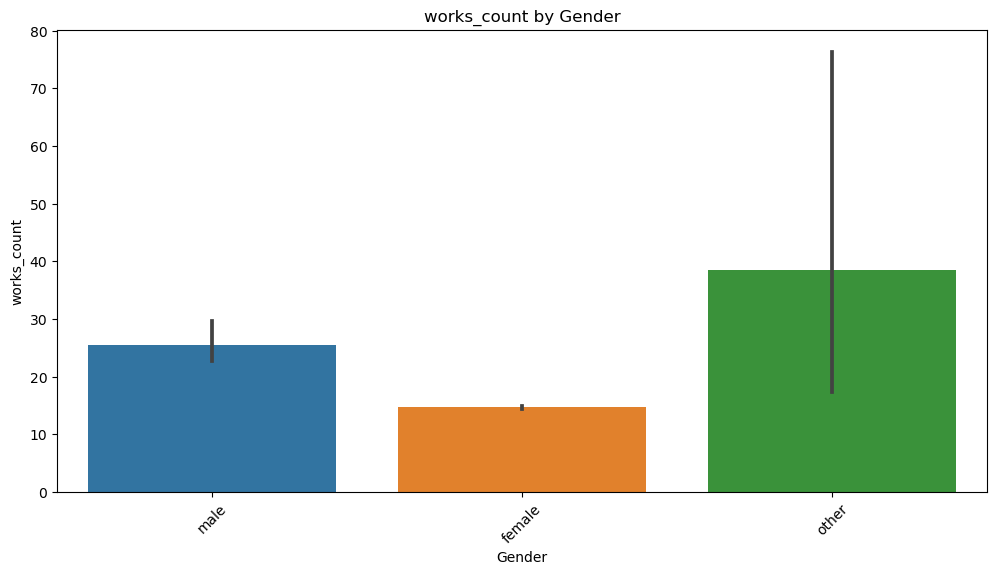

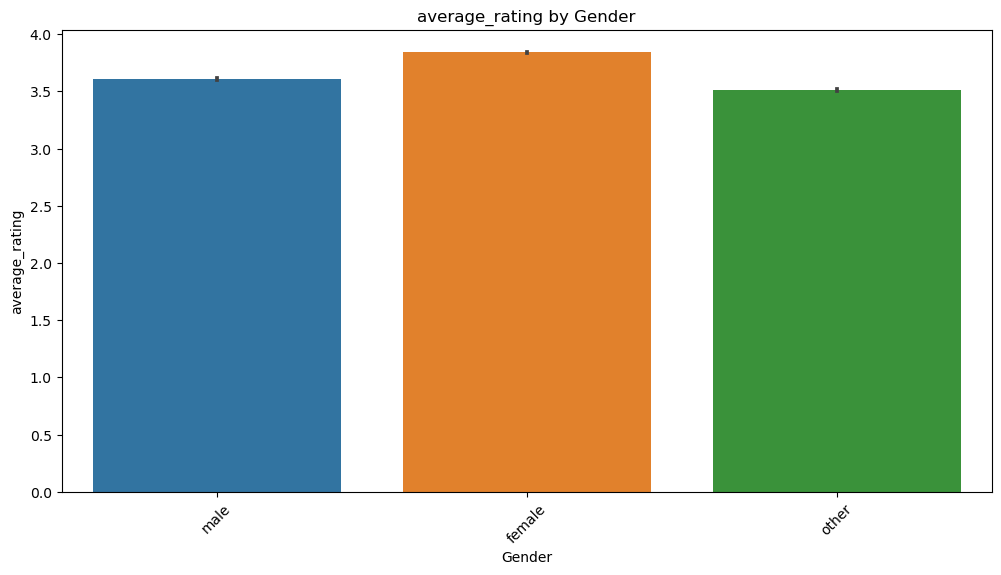

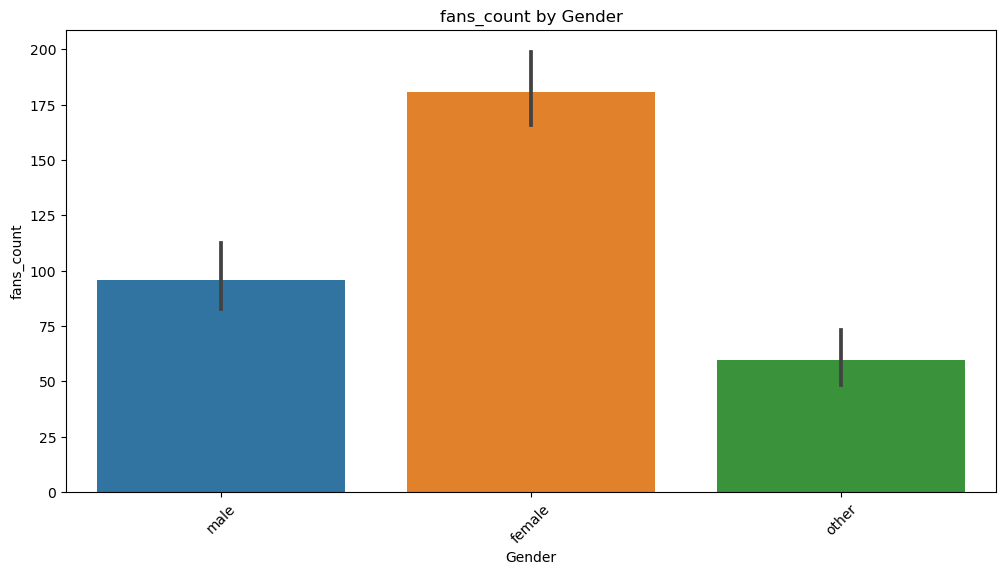

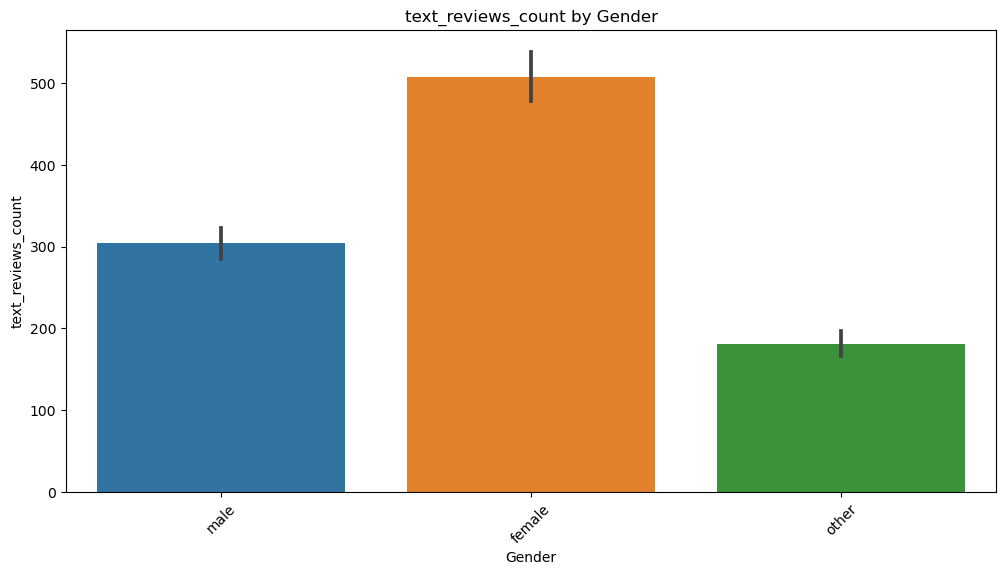

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Filter the authors with works_count and text_reviews_count >= 10
filtered_authors_df = df_authors_question_five[(df_authors_question_five['works_count'] >= 0) & (df_authors_question_five['text_reviews_count'] >= 0)]

# Use .loc to update the 'gender' column to group all other genders as 'other'
filtered_authors_df.loc[~filtered_authors_df['gender'].isin(['male', 'female']), 'gender'] = 'other'

# Group authors by gender
gender_groups = filtered_authors_df.groupby('gender')

# Calculate the number of authors for each gender group
gender_counts = gender_groups.size().reset_index(name='Number of Authors')

# Sort gender groups by the highest number of authors
sorted_gender_counts = gender_counts.sort_values(by='Number of Authors', ascending=False)

# Plot charts for gender group vs works_count, average_rating, fans_count, and text_reviews_count
metrics = ['works_count', 'average_rating', 'fans_count', 'text_reviews_count']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='gender', y=metric, data=filtered_authors_df, order=sorted_gender_counts['gender'])
    plt.title(f'{metric} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()


If we group authors by gender, including male, female, and others, we can observe that the number of works by authors in the "others" category is slightly higher than that of both female and male authors. The average ratings for these groups are fairly close to one another. However, despite the greater number of works by authors in the others category compared to female authors, the fan count and text reviews count for female authors are significantly higher than both the others group and the male group.

# [RQ6] 
### For this question, consider the top 10 authors concerning the number of fans again.
1. Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?
2. For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?


### 6.1

In [98]:
adf = adf.sort_values(by='fans_count', ascending=False)
first_10 = adf['id'].iloc[:10].tolist()

adf2 = filtered_data
filtered_df = adf2[adf2['author_id'].isin(first_10)]

df_non_series = pd.DataFrame(columns=filtered_df.columns)
df_series = pd.DataFrame(columns=filtered_df.columns)
non_series_rows = []
series_rows = []

for index, row in filtered_df.iterrows():
    if pd.isna(row['series_id']) or row['series_id'] == '':
        non_series_rows.append(row)
    else:
        series_rows.append(row)

df_series = pd.concat([df_series, pd.DataFrame(non_series_rows)])
df_non_series = pd.concat([df_non_series, pd.DataFrame(series_rows)])

In [99]:
def extract_year(date_string):
    try:
        year = int(date_string.split('-')[0])
        return year
    except:
        return None


In [100]:
df_series['Publication_year'] = df_series['original_publication_date'].apply(extract_year)
df_series = df_series.sort_values(by='Publication_year', ascending=True)

In [101]:
df_non_series['Publication_year'] = df_non_series['original_publication_date'].apply(extract_year)
df_non_series = df_non_series.sort_values(by='Publication_year', ascending=True)

In [102]:
df_series = df_series.sort_values(by='Publication_year')
df_series = df_series.reset_index(drop=True)

df_non_series = df_non_series.sort_values(by=['Publication_year','series_id'])
df_non_series = df_non_series.reset_index(drop=True)

In [103]:
sanslanguages1series = df_non_series.drop_duplicates(subset='work_id')
sanslanguages2nonseries = df_series.drop_duplicates(subset='work_id')

In [104]:
grouped = sanslanguages2nonseries.groupby('author_name')

with open('final_output2.txt', 'w') as file:
    for series, series_books in grouped:
        avg_time_diffs = []
        series_books = series_books.sort_values('Publication_year')

        series_books['Publication_year'] = pd.to_numeric(series_books['Publication_year'])

        time_diff = series_books['Publication_year'].diff()

        avg_time_diff = time_diff.mean()
        avg_time_diffs.append((series, avg_time_diff))

        for series, avg_time_diff in avg_time_diffs:
            file.write(f"Author: {series}\n")
            file.write(f"Average Time Difference: {avg_time_diff}\n")
        file.write("\n")

In [105]:
sanslanguages1series = sanslanguages1series.sort_values(by=['author_id','series_id'])
sanslanguages1series = sanslanguages1series.reset_index(drop=True)

In [106]:
sanslanguages1series['Publication_year'].replace(['', ' '], pd.NA, inplace=True)
sanslanguages1series.dropna(subset=['Publication_year'], inplace=True)
sanslanguages1series.reset_index(drop=True, inplace=True)

In [107]:
grouped = sanslanguages1series.groupby('author_name')

with open('output.txt', 'w') as file:
    for author, books in grouped:
        file.write(f"Author: {author}\n")

        series_grouped = books.groupby('series_id')

        avg_time_diffs = []

        for series, series_books in series_grouped:
            series_books = series_books.sort_values('Publication_year')

            series_books['Publication_year'] = pd.to_numeric(series_books['Publication_year'])

            time_diff = series_books['Publication_year'].diff()

            avg_time_diff = time_diff.mean()
            avg_time_diffs.append((series, avg_time_diff))

        for series, avg_time_diff in avg_time_diffs:
            file.write(f"Series: {series}, Average Time Difference: {avg_time_diff}\n")
        file.write("\n")

### 6.2


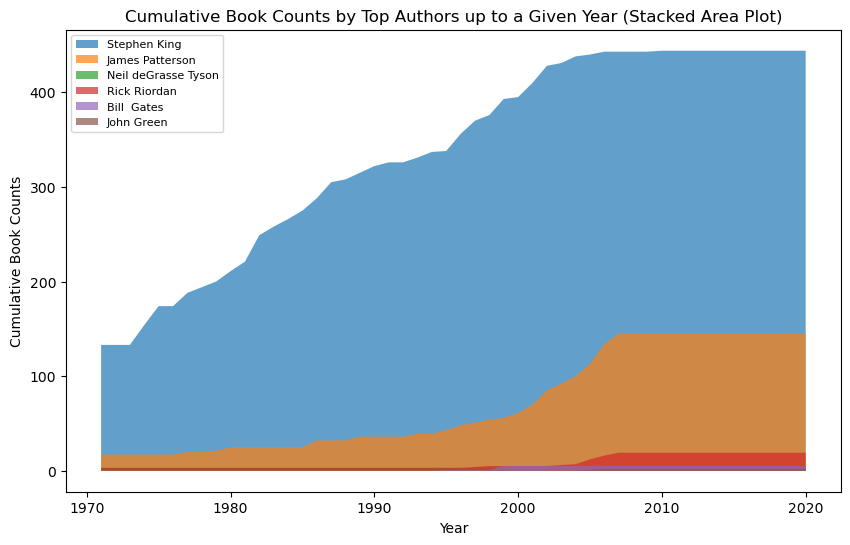

In [108]:
# Define the years range
years_range = range(1971, 2021)

# Create a DataFrame to store cumulative book counts
counts_df = pd.DataFrame(index=years_range)

# Filter out empty and missing publication dates
filtereddf2 = filtered_df[filtered_df['original_publication_date'].str.strip() != '']
filtereddf2 = filtereddf2.dropna(subset=['original_publication_date'])

# Convert 'original_publication_date' to a 4-digit year
# Convert 'original_publication_date' to a 4-digit year
filtereddf2['original_publication_date'] = pd.to_datetime(filtereddf2['original_publication_date'], errors='coerce').dt.strftime('%Y')

# Convert the column to integers while handling missing values
filtereddf2['original_publication_date'] = filtereddf2['original_publication_date'].astype(float).fillna(0).astype(int)

# Calculate cumulative book counts for each author
for author_id, author_df in filtereddf2.groupby('author_id'):
    authcount = []

    for yr in years_range:
        count = len(author_df[author_df['original_publication_date'] <= yr])
        authcount.append(count)

    authorname = filtereddf2[filtereddf2["author_id"] == author_id]["author_name"].iloc[0]
    counts_df[authorname] = authcount

# Create a stacked area plot
plt.figure(figsize=(10, 6))
for column in counts_df.columns:
    plt.fill_between(counts_df.index, counts_df[column], alpha=0.7, label=str(column))

plt.title('Cumulative Book Counts by Top Authors up to a Given Year (Stacked Area Plot)')
plt.xlabel('Year')
plt.ylabel('Cumulative Book Counts')

# Move the legend to the upper left and make it slightly smaller
plt.legend(loc='upper left', prop={'size': 8})

plt.show()


# RQ7

### Estimating probabilities is a core skill for a data scientist: show us your best!

### Estimate the probability that a book has over 30% of the ratings above 4.

In [5]:
df_books_question_seven = booksDf_org
df_books_question_seven.head()

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description
0,2,Harry Potter and the Order of the Phoenix (Har...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2809203,0439358078,9780439358071,,eng,...,Paperback,US Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,870,45175,Harry Potter,5,"[{'name': 'to-read', 'count': 324191}, {'name'...",There is a door at the end of a silent corrido...
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,4640799,,,,eng,...,Hardcover,Library Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc,309,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63540}, {'name':...",Harry Potter's life is miserable. His parents ...
2,4,Harry Potter and the Chamber of Secrets (Harry...,None,J.K. Rowling,1077326,6231171,0439554896,9780439554893,,eng,...,Hardcover,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,352,45175,Harry Potter,2,"[{'name': 'to-read', 'count': 282341}, {'name'...",The Dursleys were so mean and hideous that sum...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2402163,043965548X,9780439655484,,eng,...,Mass Market Paperback,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,435,45175,Harry Potter,3,"[{'name': 'to-read', 'count': 292815}, {'name'...","For twelve long years, the dread fortress of A..."
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,3046572,,,,eng,...,Paperback,First Scholastic Trade Paperback Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,734,45175,Harry Potter,4,"[{'name': 'to-read', 'count': 287086}, {'name'...",Harry Potter is midway through his training as...


In [6]:
columns = ['title', 'work_id', 'num_pages', 'author_name', 'rating_dist', 'average_rating']
booksDfcleaned = df_books_question_seven[columns]

In [7]:
rating_dist_series = booksDfcleaned["rating_dist"]
def calculate_proportion_4_and_5_star(rating_distribution):

    ratings = rating_distribution.split('|')
    total_ratings = 0
    four_star_ratings = 0
    five_star_ratings = 0

    for rating in ratings:
        key, value = rating.split(':')
        if key == 'total':
            continue  # Skip the 'total' entry
        key = int(key)
        value = int(value)
        total_ratings += value
        if key == 5:
            five_star_ratings = value
        if key == 4:
            four_star_ratings = value

    if total_ratings == 0:
        return 0.0, 0.0  # Handle the case where there are no ratings

    proportion_4_star = four_star_ratings / total_ratings
    proportion_5_star = five_star_ratings / total_ratings
    return proportion_4_star, proportion_5_star

# Apply the function to calculate both 4-star and 5-star proportions
proportions = rating_dist_series.apply(calculate_proportion_4_and_5_star)

# Unpack the proportions into separate columns
booksDfcleaned[['proportion_4_star', 'proportion_5_star']] = pd.DataFrame(proportions.tolist(), index=proportions.index)



# Estimate the probability that a book has over 30% of the ratings 4 and above 4
probability_over_30_percent = (booksDfcleaned['proportion_4_star'] + booksDfcleaned['proportion_5_star']) > 0.3
estimated_probability = probability_over_30_percent.mean()

print("Estimated Probability of Over 30% 4-Star and 5-Star Ratings:", estimated_probability)


Estimated Probability of Over 30% 4-Star and 5-Star Ratings: 0.9567530804928789


Estimated Probability of Over 30% 4-Star and 5-Star Ratings is 0.9567530804928789

#####Estimate the probability that an author publishes a new book within two years from its last work.

In [8]:

grouped = df_books_question_seven.groupby(['author_name', 'author_id'])

total_authors = 0
authors_with_new_work = 0


for (author_name, author_id), works in grouped:
    works = works.sort_values(by='original_publication_date')

    works['original_publication_date'] = pd.to_datetime(works['original_publication_date'], format="%Y", errors='coerce')

    for i in range(1, len(works)):
        time_gap = works.iloc[i]['original_publication_date'] - works.iloc[i-1]['original_publication_date']
        if not pd.isna(time_gap) and time_gap <= pd.Timedelta(days=730):
            authors_with_new_work += 1
            break
    total_authors += 1

# Calculate the probability
probability = authors_with_new_work / total_authors

print("Estimated probability that an author publishes a new book within two years from its last work:", probability)


Estimated probability that an author publishes a new book within two years from its last work: 0.17965447528027936


Estimated probability that an author publishes a new book within two years from its last work is 0.17965447528027936

#####In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has more than 700 pages.

In [9]:
df_worst_question_seven = listDf
df_worst_question_seven.head()

,id,title,description,description_html,num_pages,num_books,num_voters,created_date,tags,num_likes,created_by,num_comments,books
0,2,The Worst Books of All Time,What do you think are the worst books ever wri...,\n What do you think are the worst books ...,74,7395,18260,"May 20th, 2008","[abominable, abomination, awful, bad, disgusti...",175,"{'name': 'Michael Economy', 'id': '73'}",2570,"[{'book_id': '41865', 'title': 'Twilight', 'au..."
1,3,Best Science Fiction & Fantasy Books,Anything in the science fiction or fantasy gen...,\n Anything in the science fiction or fan...,71,7023,21747,"May 29th, 2008","[best-fantasy, best-science-fiction, earliest-...",2989,"{'name': 'deleted user', 'id': ''}",307,"[{'book_id': '375802', 'title': 'Ender's Game'..."
2,4,Best Books of 2008,The best books first published during 2008.See...,\n The best books first published during ...,17,1678,6939,"May 29th, 2008","[2008, best, by-year, earliest-list, fiction, ...",59,"{'name': 'deleted user', 'id': ''}",181,"[{'book_id': '2767052', 'title': 'The Hunger G..."
3,5,Best Books of the Decade: 2000s,The best books published during the 2000s deca...,\n The best books published during the 20...,70,6919,28249,"May 29th, 2008","[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",1192,"{'name': 'deleted user', 'id': ''}",163,"[{'book_id': '136251', 'title': 'Harry Potter ..."
4,6,Best Books of the 20th Century,The best books published during the 20th centu...,\n The best books published during the 20...,76,7600,49437,"May 29th, 2008","[20th, 20th-century, best, by-century, by-year...",6083,"{'name': 'deleted user', 'id': ''}",510,"[{'book_id': '2657', 'title': 'To Kill a Mocki..."


Arranging the list so that we can work on that.

In [10]:
worst_title = df_worst_question_seven[df_worst_question_seven['title'] == 'The Worst Books of All Time']
worst_books_list= worst_title["books"]
series_data = worst_books_list[0]

# Convert the list of dictionaries to a DataFrame
df = pd.concat([pd.DataFrame(d, index=[0]) for d in series_data])

# Specify the desired columns
columns = ['book_id', 'title',  'author_id', 'author']

# Select and arrange the columns
result = df[columns]

# Reset the DataFrame's index
result.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame
print(result)




       book_id                                              title author_id  \
0        41865                                           Twilight    941441   
1      1162543                                      Breaking Dawn    941441   
2        49041                                           New Moon    941441   
3       428263                                            Eclipse    941441   
4     10818853                               Fifty Shades of Grey   4725841   
...        ...                                                ...       ...   
7388  30317417                               Most Dangerous Place     27572   
7389  40139233  Sacred Duty: A Soldier's Tour at Arlington Nat...   7742817   
7390    176392  Who Stole Feminism? How Women Have Betrayed Women       393   
7391   1318015  Woulda, Coulda, Shoulda: Overcoming Regrets, M...     48336   
7392  45880352  COTTON - ON THE RECORD: A Collection of Senato...  17626436   

                      author  
0            Stephen

In [11]:


# Convert 'num_pages' column to numeric, converting invalid values to NaN
booksDfcleaned['num_pages'] = pd.to_numeric(booksDfcleaned['num_pages'], errors='coerce')

# Remove rows with NaN values in 'num_pages'
filtered_books = booksDfcleaned.dropna(subset=['num_pages'])

# Filter the dataset to include only books with more than 700 pages
filtered_books = filtered_books[filtered_books['num_pages'] > 700]

# Calculate the total number of books in the filtered_books dataset
total_books_in_filtered = len(filtered_books)

# Calculate the number of books in the filtered_books dataset that are also in the result dataset
common_books = len(set(filtered_books['title']).intersection(result['title']))

# Calculate the probability
probability = common_books / total_books_in_filtered

print("Probability of a book with more than 700 pages in booksDfcleaned being included in results: {:.2%}".format(probability))


Probability of a book with more than 700 pages in booksDfcleaned being included in results: 3.67%


Probability of a book with more than 700 pages being included in The Worst Books of All Time is 3.67%

#####Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.

In [12]:
# Calculate the probability of a book from booksDfcleaned being included in The Worst Books of All Time list (X)
total_books = len(booksDfcleaned)
books_in_worst_list = len(result)
P_X = books_in_worst_list / total_books

# Calculate the probability of a book from booksDfcleaned having more than 700 pages (Y)
books_with_more_than_700_pages = len(booksDfcleaned[booksDfcleaned['num_pages'].astype(float) > 700])
P_Y = books_with_more_than_700_pages / total_books

# Calculate the conditional probability of a book from booksDfcleaned being included in the worst list given that it has more than 700 pages (X | Y)
common_titles = set(booksDfcleaned[booksDfcleaned['num_pages'].astype(float) > 700]['title']).intersection(result['title'])
books_in_worst_list_and_more_than_700_pages = len(common_titles)
P_X_given_Y = books_in_worst_list_and_more_than_700_pages / books_with_more_than_700_pages

# Check for independence
if P_X == P_X_given_Y:
    print("The events X and Y are independent.")
else:
    print("The events X and Y are dependent. ")


The events X and Y are dependent. 


The code calculates the probabilities of two events: X, being included in the worst books list, and Y, having more than 700 pages. It then checks whether these events are independent. If the probability of X (P_X) equals the conditional probability of X given Y (P_X_given_Y), it implies that X and Y are independent, meaning that being on the worst books list is unrelated to the book's page count. As a result  P_X and P_X_given_Y are not equal, it suggests that X and Y are dependent.

# [RQ8]
Charts, statistical tests, and analysis methods are splendid tools to illustrate your data-driven decisions to check whether a hypothesis is correct.

##### [RQ8.1] Can you demonstrate that readers usually rate the longest books as the worst?

Since the data frame is way too onerous to be read in it's entirety the way we managed to access it is by proccessing chunks.
And during this procedure we also apply some conditions to the data in order to make it more meaningful.

In [13]:

data = booksDf[['language', 'num_pages', 'average_rating', 'rating_dist', 'ratings_count']]

data['num_pages'] = pd.to_numeric(data['num_pages'], errors = 'coerce')
data = data[(data['num_pages'] > 0)]
data = data[(data['num_pages'] < 5000)]
data = data[(data['average_rating'] > 0)]
data = data[(data['average_rating'] <= 5)]
data = data.dropna(subset = ['num_pages', 'average_rating'])

Once we have created a data frame containing the desired columns we can start to analyze the data via a scatter plot and applying a linear regression to measure the dependencies of the two variables.

In [14]:
rq8_books = data

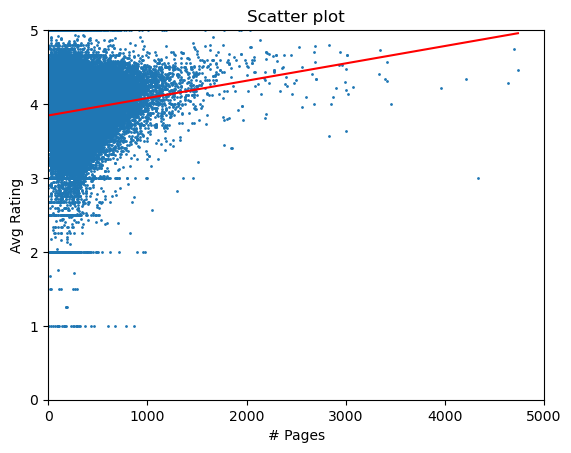

In [15]:
plt.scatter(rq8_books['num_pages'], rq8_books['average_rating'], 1)
plt.xlabel('# Pages')
plt.xlim(0,5000)
plt.ylabel('Avg Rating')
plt.ylim(0,5)

z = np.polyfit(rq8_books['num_pages'], rq8_books['average_rating'], 1)
p = np.poly1d(z)

x_line = np.linspace(rq8_books['num_pages'].min(), rq8_books['num_pages'].max(), 5000)
y_line = p(x_line)

plt.ylim(0,5)
plt.xlabel('# Pages')
plt.ylabel('Avg Rating')
plt.title('Scatter plot')

plt.plot(x_line, y_line, color = 'red')

plt.show()

The plot shows that there is a positive correlation between the two variables, this can be seen by the positive angolar coefficient in the regression line.<br/><br/>
The junction point between the y-axis and the line represents the intercept.<br/><br/>
In order to have a clear numerical number for the correlation between num_pages and average_rating it's used the command .corr()

In [16]:
rq8_books[['num_pages', 'average_rating']].corr()

,num_pages,average_rating
num_pages,1.000000,0.145904
average_rating,0.145904,1.000000


In [17]:
correlation = rq8_books['num_pages'].corr(rq8_books['average_rating'])
print(correlation)

0.14590431418804456


We also plot a heat map to get a better view on the distribution and understand how the data is dislocated.<br/><br/>
This type of analysis is done because using a scatter plot we don't really get an appropriate understanding of the data.
This plot clearly shows when there data tends to cluster.

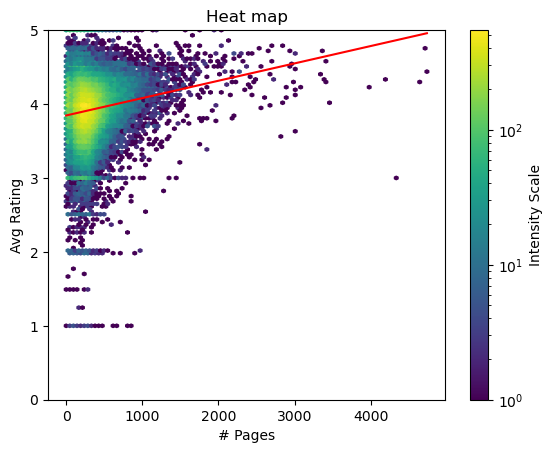

In [18]:
plt.hexbin(rq8_books['num_pages'], rq8_books['average_rating'], bins = 'log', gridsize = 100)

#linear regression
z = np.polyfit(rq8_books['num_pages'], rq8_books['average_rating'], 1)
p = np.poly1d(z)

x_line = np.linspace(rq8_books['num_pages'].min(), rq8_books['num_pages'].max(), 5000)
y_line = p(x_line)

cbar = plt.colorbar()
cbar.set_label('Intensity Scale')

plt.ylim(0,5)
plt.xlabel('# Pages')
plt.ylabel('Avg Rating')
plt.title('Heat map')

plt.plot(x_line, y_line, color = 'red')
plt.show()

The analysis done on the variables num_pages and average_rating shows that there is a slightly positive correlation between the two columns.
Therefore we can affirm that it's not true that readers usually rate the longest books as the worst, based on this dataset.<br/><br/>
An explanation may be that the amount of books with less than a thousand pages is by far greater in respect to the ones that have more pages, and this can cause a lowering in the intercept of the regression.<br/><br/>
This can be immidiately seen from the scale of the color.

##### [RQ8.2] Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?


We begin by separating the books written in english from the ones written in another language, then extract the variable average_rating of the two groups.

In [19]:
books_languages = rq8_books[(rq8_books['language'] != ' ')]

eng = books_languages[( (books_languages['language'] == "eng") | (books_languages['language'] == "en-US") | (books_languages['language'] == "US") | (books_languages['language'] == "en-GB") )] # & (books['average_rating'] >0 )
non_eng = books_languages[( (books_languages['language'] != "eng") & (books_languages['language'] != "en-US") & (books_languages['language'] != "US") & (books_languages['language'] != "en-GB") )] # & (books['average_rating'] >0 )

eng_avg_r = eng['average_rating']
non_eng_avg_r = non_eng['average_rating']

We can get a useful summary of the groups with the command .describe()

In [20]:
print(eng_avg_r.describe())

count    32032.000000
mean         3.943912
std          0.285044
min          1.000000
25%          3.780000
50%          3.960000
75%          4.130000
max          5.000000
Name: average_rating, dtype: float64


Now we procede by visualizing via histograms the two distributions.

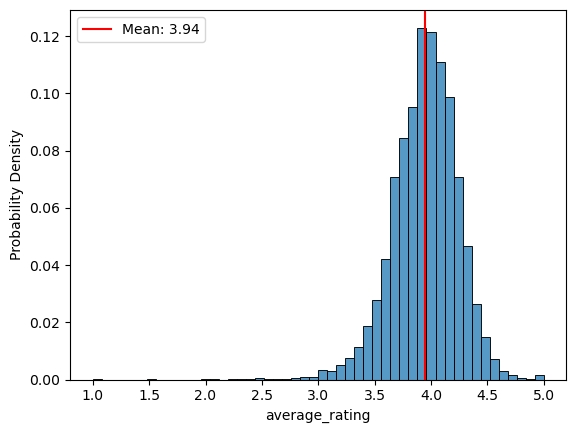

In [21]:
sns.histplot(eng['average_rating'], bins= 50, stat = 'probability')
plt.xlabel('average_rating')
plt.ylabel('Probability Density')

mean = eng['average_rating'].mean()
plt.axvline(x = mean, color = 'red', label = f'Mean: {mean:.2f}')
plt.legend()

plt.show()

(0.0, 5.0)

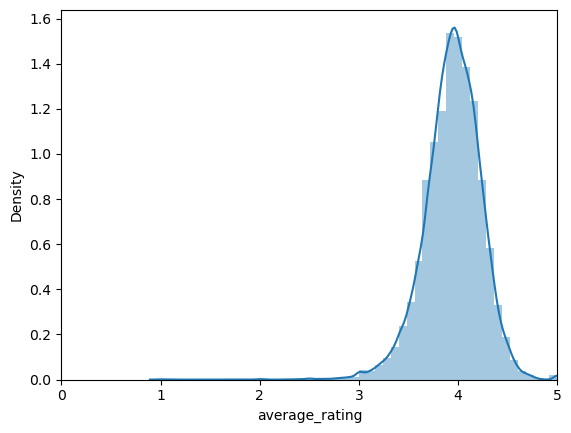

In [22]:
sns.distplot(eng['average_rating'])
plt.xlim(0,5)

In [23]:
print(non_eng_avg_r.describe())

count    41953.000000
mean         3.896563
std          0.387526
min          1.000000
25%          3.690000
50%          3.920000
75%          4.130000
max          5.000000
Name: average_rating, dtype: float64


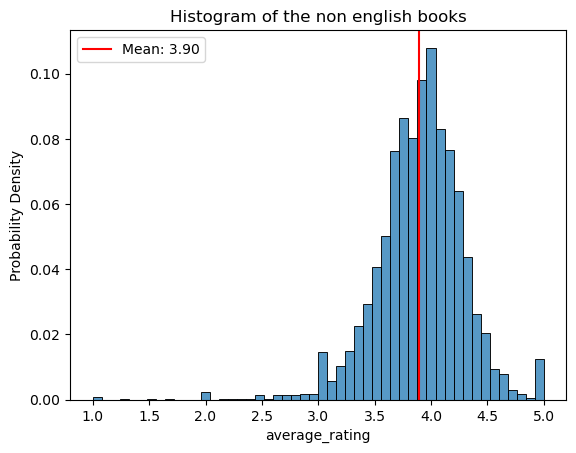

In [24]:
sns.histplot(non_eng['average_rating'], bins= 50, stat = 'probability')
plt.xlabel('average_rating')
plt.ylabel('Probability Density')
plt.title('Histogram of the non english books')

mean = non_eng['average_rating'].mean()
plt.axvline(x = mean, color = 'red', label = f'Mean: {mean:.2f}')
plt.legend()

plt.show()

(0.0, 5.0)

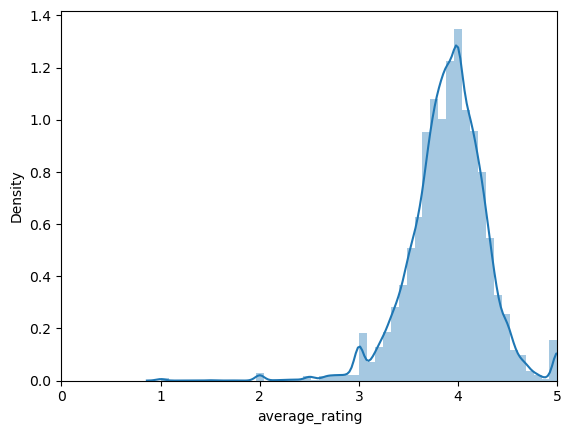

In [25]:
sns.distplot(non_eng['average_rating'])
plt.xlim(0,5)

We can now compare the two groups by visualizing the corrispondent boxplot.<br/><br/>


<function matplotlib.pyplot.show(close=None, block=None)>

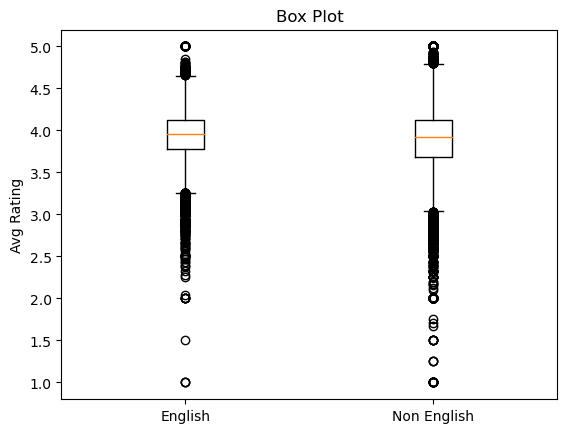

In [26]:
plt.boxplot([eng_avg_r, non_eng_avg_r], labels = ['English', 'Non English'])
plt.title('Box Plot')
plt.ylabel('Avg Rating')
plt.show

To compare the the average rate distribution we can also implement some statistical test.
Firstly we can evaluate if there is normality in the distributions but as shown from these test they are not conclusive.<br/><br/>
Then we apply some specific non parametric test but the results obtained weren't enough to satisfy our needs.

In [27]:
# T-test
t_statistic, t_value = stats.ttest_ind(eng['average_rating'], non_eng['average_rating'])
print('The test statistic for the t-test is: ', t_statistic)
print('The t value is: ', t_value)

The test statistic for the t-test is:  18.39550381129777
The t value is:  2.1039636868365333e-75


In [28]:
# Kolmogorov-Smirnov test (KS test)
ks_statistic, ks_value = ks_2samp(eng['average_rating'], non_eng['average_rating'])
print('The test statistic for the Kolmogorov-Smirnov test is: ', ks_statistic)
print('The ks value is: ', ks_value)

The test statistic for the Kolmogorov-Smirnov test is:  0.08995345747261582
The ks value is:  2.420881728148707e-128


In [29]:
# Fisher Test
threshold = 4
a1 = (eng[(eng['average_rating'] >= threshold)]['average_rating']).sum()
a2 = (eng[(eng['average_rating'] < threshold)]['average_rating']).sum()
b1 = (non_eng[(non_eng['average_rating'] >= threshold)]['average_rating']).sum()
b2 = (non_eng[(non_eng['average_rating'] >= threshold)]['average_rating']).sum()

contingency_table = [[a1, a2], [b1, b2]]
odds_ratio, f_value = fisher_exact(contingency_table)
print(contingency_table)
print(odds_ratio)
print(f_value)

[[59317.97, 67013.41], [73455.34, 73455.34]]
0.8851566114037575
8.050812299023933e-57


In [30]:
_, p_value_avg_rating = stats.shapiro(rq8_books['average_rating'])

# Normality test for the group of english books
_, p_value_english = stats.shapiro(eng['average_rating'])

# Normality test for the group of non english books
_, p_value_no_english = stats.shapiro(non_eng['average_rating'])

print(f"Normality test for Average Rating, p-value: {p_value_avg_rating}\n")

print(f"Normality test for books in english, p-value: {p_value_english}\n")

print(f"Normality test for books that are not in english,p-value: {p_value_no_english}")

Normality test for Average Rating, p-value: 0.0

Normality test for books in english, p-value: 0.0

Normality test for books that are not in english,p-value: 0.0


##### [RQ8.3] About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.


A box plot or box-and-whisker plot, is a graphical tool that provides a concise summary of the distribution from a dataset.<br/><br/>
Box plots are extraordirary useful when comparing the distributions of multiple datasets or when visualizing non-normally distributed data.
It shows clearly the spreadness and the skewness of the data along with outliers.<br/><br/>
We are now analyzing each statistic in more detail.
- Mode: is the values that occures with highest frequency in the dataset, it helps to identify the most common value.
- Mean: it's the sum of all data points divided by the number of data points, it's represented as a point and gives informations about the central location of the data distribution but it's sentitive to outliers.
- Median: is the middle value in a dataset when the arrangement of values is in ascending or descending order. In a box plot, it's the central line within the box and it's not affected by outliers.
- Quartiles: they divide the dataset into four equal parts, each containing 25% of the data points.
    1. Q1: is the lower horizontal line that composes the box.
    2. Q2: is the median, the line that separates the dataset in two equal parts.  
    3. Q3: is the higher horizontal line that composes the box.<br/><br/>
In this specific case we have that:
- English books:<br/><br/>
mean 3.900390<br/><br/>
std 0.453041<br/><br/>
Q1 3.670000<br/><br/>
Q2 3.920000<br/><br/>
Q3 4.140000<br/><br/>

- Non english books:<br/><br/>
mean 3.847283<br/><br/>
std 0.507422<br/><br/>
Q1 3.600000<br/><br/>
Q2 3.880000<br/><br/>
Q3 4.120000<br/><br/>
So we can conclude that the are no evident changes in the distributions

##### [RQ8.4] It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.

To answer this question we need to create a new data frame from the authors file containing the columns ratings_count and fans_count.<br/><br/>
As we did for the books file we process the data by chunks and apply some conditions to filter the meaningful records adn finally save the dataset in a json file.

In [31]:
size = 10000
chunks = []
adata = authorsDf[['ratings_count', 'fans_count']]

adata['fans_count'] = pd.to_numeric(adata['fans_count'], errors = 'coerce')
adata = adata[(adata['fans_count'] > 0)]
adata = adata[(adata['ratings_count'] > 0)]
adata = adata.dropna(subset = ['fans_count', 'ratings_count'])


In [32]:
rq8_4_books =  adata


Mean Squared Error: 14055098366.819086
R-squared: 0.25257196464497067


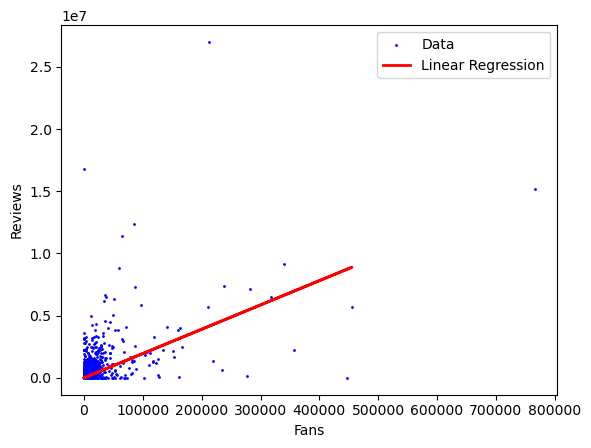

In [33]:
X = rq8_4_books[['fans_count']]

y = rq8_4_books['ratings_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.scatter(X, y, color='blue', label='Data', s = 1)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Fans')
plt.ylabel('Reviews')
plt.legend()
plt.show()


In [34]:
# Correlation between "fans_count" e "ratings_count"
correlation, p_value = pearsonr(rq8_4_books['fans_count'], rq8_4_books['ratings_count'])

# Print the correlation and the p-value
print(f"Correlation between fans_count and ratings_count: {correlation}")
print(f"P-value: {p_value}")

# Verify if the correlation is significative
if p_value < 0.05:
    print("The correlation is significative")
else:
    print("The correlation is not significative")

Correlation between fans_count and ratings_count: 0.5805966932178688
P-value: 0.0
The correlation is significative


As expected the amount of fans has an impact on the amount of reviews on average

In [35]:
t_stat, p_value = stats.ttest_ind(rq8_4_books['fans_count'], rq8_4_books['ratings_count'])

if p_value < 0.05:
    print('Reject null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject null hypothesis


In [36]:
author_regression = rq8_4_books[['ratings_count', 'fans_count']]

In [37]:
model = ols('ratings_count ~ fans_count', data=author_regression).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          ratings_count   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                 1.326e+05
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:21:32   Log-Likelihood:            -3.3511e+06
No. Observations:              260739   AIC:                         6.702e+06
Df Residuals:                  260737   BIC:                         6.702e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3223.5650    181.068     17.803      0.0

##### [RQ8.5] Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.

Statistical tests are essential tools in data analysis and data mining.
The nature of the data and the assumptions one can make will determine the choice between using a parametric or nonparametric tests.<br/><br/>
Parametric Tests
- Linear Regression.<br/><br/>
It compares the means of two independent samples and it is used when the data follow a normal distribution and there is the need of comparing means but it's sensitive to small sample sizes.<br/><br/>
It's purpose is to explore and model the relationship between a dependent variable, also called target, and one or more independent variables, also known as features.
It's usage is mainly to make predictions, understand dependecies and to identify significant factors in data.<br/><br/>
Hypothesis design in Linear Regression:<br/><br/>
1. Null hypothesis (H<sub>0</sub>): tipically it states that there is no significant relationship between the independent variables and the dependent one.
2. Alternative hypothesis (H<sub>1</sub>): it counters the null hypothesis. It suggests that there is a significant relationship between the features and the target.
3. Significance level ($\alpha$): it represents the probability threshold at which it'll determine whether to reject the null hypothesis or not, common values of $\alpha$ are 0.05 and 0.01.<br/><br/>
Once the model is contructed and evaluated, predictions on the target can be made using input values for the independet variables.<br/><br/>
Inference can be drawn from the coefficients to understang the direction and the strength of the relationship between variables.
- Analysis of Variance (ANOVA).<br/><br/>
It's used to compare means between three or more groups. ANOVA assess whether there are statistically significant differences among the group means.<br/><br/>
Hypothesis design in the Analysis of Variance.<br/><br/>
1. Null hypothesis (H<sub>0</sub>): it affirms that there are no significant differences between the means of the groups taken into account.
2. Alternative hypothesis (H<sub>1</sub>): is the opposite to the null hypothesis and states that at least one group's mean is different from the others.<br/><br/>
The steps required to make a valuable study are: data collection, data assumptions, the computation of the sample means and variances for each group, the ANOVA tedt statistic tha indicates the ratio of two variances (between and within), comparing the p-value to the level of significance to make a decision whether reject or not the null hypothesis and if necessary post-hoc tests can be used to identify which specifi group means differ from each other.<br/><br/>
Nonparametric Tests.<br/><br/>
Although we didn't have a chance to study them yet, the reaserch done was essential to answer properly to the question.<br/><br/>
- Spearman's Rank-Order correlation.<br/><br/>
It's used in data analysis and data mining to assess the strenght and direction of the monotonic relationship between two variables, thus when assumptions of linear correlation aren't met.<br/><br/>
Hypothesis design in the Spearman's Rank-Order correlation.<br/><br/>
1. Null hypothesis: it declares that there is no significant monotonic relationship between the two variables.
2. Alternative Hypothesis (H<sub>1</sub>): The alternative hypothesis suggests the presence of a monotonic relationship between the variables. Depending on your research question, it can take different forms.<br/><br/>
The steps in performing Spearman's Rank-Order correlations are: data collection, assign a rank to each data point for both variables, calcualte the differences that will be later on squared and summed to finally compute the Spearman's rank correlation coefficient, $\rho$, using the formula.
After obtaining $\rho$ we compare it with the critical value from the so called tables of critical values or we can use a software to find the p-value. Lastly, we make a decision based on the p-value and the chosen level of significance.<br/><br/>
- Kruskal-Wallis test.<br/><br/>
It determines if there are significant differences in the medians of three or more independent groups, it is a powerful tool for comparing multiple groups when assumptions of normality and equal variances are violated.
Hypothesis design in the Kruskal-Wallis test.<br/><br/>
1. Null hypothesis (H<sub>0</sub>): it states that there are no significant differences among the medians of the groups being compared.
2. Alternative hypothesis (H<sub>1</sub>): it claims that at least one group's median is different from the others.<br/><br/>
Steps in Performing the Kruskal-Wallis test are: as always data collection, then ranking for each group and rank the data combined across all groups, calculation of the Kruskal-Wallis test statistic (H) using the formula which is pretty complex and it's often used a software to compute it. In this test there are also degrees of freedom, which depend on the number of groups and the sample size, then using the test statistic, degrees of freedom and significance level we can oper in two ways, we can either compare H to a critical value from the chi-squared distribution table to make a decision or again use a software to obtain a p-value.






# Algorithmic Question

In [40]:
from collections import deque
instructions = list(map(str, input().split()))
def process_instructions(instructions):
    shelf = deque()
    answers = []
    for instructions in instructions:
        command, b_id =instructions.split()
        b_id = int(b_id)
        if command == 'L':
            shelf.appendleft(b_id)
        elif command == 'R':
            shelf.append(b_id)
        else:
            left_count = shelf.index(b_id)
            right_count = len(shelf) - left_count -1
            answers.append(min(left_count, right_count))
    return answers

instructions = ['R 1', 'L 2', 'L 3', 'L 4', '? 3', 'R 5', 'R 6',
                'L 7', 'L 8', '? 4', 'L 9', 'R 10', 'R 11', 'L 12', 'L 13', '? 11', '? 3']
print(process_instructions(instructions))

 ['R 1', 'L 2', 'L 3', 'L 4', '? 3', 'R 5', 'R 6',                 'L 7', 'L 8', '? 4', 'L 9', 'R 10', 'R 11', 'L 12', 'L 13', '? 11', '? 3']


[1, 2, 0, 6]


ChatGPT answer:

Let's analyze the time complexity of your code:

Initializing shelf as a deque has a constant time complexity and doesn't significantly impact the overall complexity.

The main part of the code is the loop that iterates through the instructions. The time complexity of this loop is O(N), where N is the number of instructions.

Inside the loop, for 'L' and 'R' commands, both appendleft and append operations on a deque have an average time complexity of O(1). They are efficient operations because deques are designed to perform well at both ends.

For the '?' command, the code uses shelf.index(b_id), which has an average time complexity of O(N). This operation searches for the index of b_id in the deque. In the worst case, it might need to iterate through the entire deque to find the index.

Calculating right_count and appending the minimum of left_count and right_count to the answers list also have a time complexity of O(1).

The overall time complexity of your code is determined by the most time-consuming operation, which is the shelf.index(b_id) operation inside the loop. Therefore, the code's time complexity is O(N^2) because for each '?' command, you may have to perform a linear search through the shelf deque. This can be inefficient for large input sizes.

To improve the code's efficiency, you can consider using a different data structure or approach to calculate the left and right counts in O(N) time, avoiding the need to search through the deque for each '?' command.


Bard answer:


The time complexity of the code you provided is O(n) for the following reasons:

The deque class implements all operations in O(1) time, except for the index() method, which takes O(n) time in the worst case.
The process_instructions() function iterates over the input instructions and performs the following operations for each instruction:
Splits the instruction into two parts: the command and the book ID. This takes O(1) time.
Converts the book ID to an integer. This takes O(1) time.
If the command is "L" or "R", appends the book ID to the left or right of the shelf. This takes O(1) time.
If the command is "?", calculates the minimum number of books to pop from the left or right to have the given book as the leftmost or rightmost book on the shelf. This takes O(n) time in the worst case, since the shelf.index() method is called.
Therefore, the time complexity of the process_instructions() function is O(n) in the worst case.
However, the average-case time complexity of the process_instructions() function is O(1), since the shelf.index() method is not called for most instructions.

In conclusion, the time complexity of the code you provided is O(n) in the worst case and O(1) in the average case.

Another way to calculate the code's time complexity is to do it manually.<br/><br/>
At first we analyze each operation, then count the dominant ones and adding up the time complexities taking into consideration also loops or possible nested loops that alterate greatly the complexity.

This algorithm may not be the most efficient because for each type 3 instruction it has to compute 'shelf.index(boo_id)' that has a time complexity of O(N).<br/><br/>
A more efficient strategy could be just to count the occurencies of 'L' and 'R' instructions and instead of going through the whole shelf every time the instruction is of the type '?N' just answer with the counter for 'L' or 'R' command done after the book with id = N was placed on the shelf.

#Command Line Question
Using the command line is a feature that Data Scientists must master. It is relevant since the operations there require less memory to use in comparison to other interfaces. It also uses less CPU processing time than other interfaces. In addition, it can be faster and more efficient and handle repetitive tasks quickly.

Note: To answer the question in this section, you must strictly use command line tools. We will reject any other method of response.

Looking through the files, you can find series.json, which contains a list of book series. In each series's 'works' field, you'll find a list of books that are part of that series. Report the title of the top 5 series with the highest total 'books_count' among all of their associated books using command line tools.

1. Write a script to provide this report. Put your script in a shell script file with the appropriate extension, then run it from the command line. The file should be called commandline_original.[put_the_proper extension]
2. Try interacting with ChatGPT or any other LLM chatbot tool to implement a more robust script implementation. Your final script should be at most three lines. Put your script in a shell script file with the appropriate extension, then run it from the command line. The file should be called commandline_LLM.[put_the_proper_ extension]. Add in your homework how you employed the LLM chatbot tools, validate if it is correct, and explain how you check its correctness.

`commandline.sh`

```bash
echo -e "id\ttitle\ttotal_book_count"
jq -r -s 'group_by(.title) | map({id: .[0].id, title: .[0].title, bookCount: map(.works[].books_count | tonumber) | add}) | sort_by(.bookCount) | reverse | .[:5] | .[] | "\(.id)\t\(.title)\t\(.bookCount)"' series.json
```

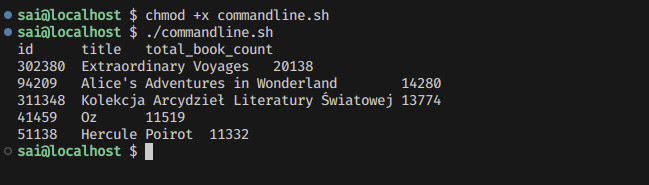

`commandline_LLM.sh`
```bash
(echo -e "\e[1;34m\e[1mid       title                                     total_book_count\e[0m" \
&& jq -r -s 'group_by(.title) | map({id: .[0].id, title: .[0].title, bookCount: (map(.works[].books_count | tonumber) | add // 0)}) | sort_by(.bookCount) | reverse | .[:5] | .[] | "\(.id) |\(.title) |\(.bookCount) |"' series.json | column -t -s '|') \
|| echo "An error occurred"
```

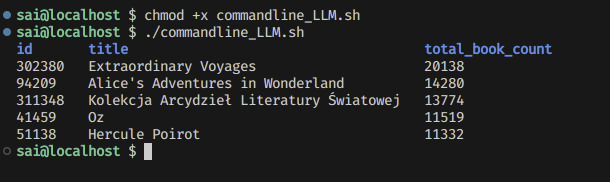

#BONUS

###

#####Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload authors.json dataset, and filter authors with at least 100 reviews. Do the same using Pandas and compare performance in terms of milliseconds.

In [41]:
df_authors_bonus = authorsDf
df_authors_bonus.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


In [42]:




# Start measuring execution time
start_time = time.time()

# Filter authors with at least 100 reviews
filtered_authors_pandas = df_authors_bonus[df_authors_bonus['text_reviews_count'] >= 100]

# End measuring execution time
end_time = time.time()

# Calculate the execution time in milliseconds
execution_time_pandas = (end_time - start_time) * 1000

# Print the filtered DataFrame
print(filtered_authors_pandas)

# Print execution time in milliseconds
print(f"Pandas execution time: {execution_time_pandas:.2f} ms")


        ratings_count  average_rating  text_reviews_count  \
0             2862064            4.19               62681   
1             1417316            4.02               84176   
2               56159            4.53                 352   
3                3302            3.79                 480   
4                7979            3.60                 772   
...               ...             ...                 ...   
351702           1033            4.13                 203   
351711           1280            4.14                 101   
351712           1604            4.13                 191   
351724            216            4.16                 123   
351736           2972            3.28                 639   

                                                 work_ids  \
0       [3078186, 135328, 1877624, 74123, 3078120, 104...   
1       [613469, 2305997, 940892, 2611786, 7800569, 31...   
2       [17150, 808427, 20487307, 90550, 25460625, 171...   
3       [4417, 14300808

Pandas execution time: 167.77 ms

In [46]:



# Load data into a Dask DataFrame
df_authors_bonus = authorsDf

# Start measuring execution time
start_time = time.time()

# Filter authors with at least 100 reviews
filtered_authors_dask = df_authors_bonus[df_authors_bonus['text_reviews_count'] >= 100]

# End measuring execution time
end_time = time.time()

# Calculate the execution time in milliseconds
execution_time_dask = (end_time - start_time) * 1000

# Compute the result to execute the filtering

# Print the filtered DataFrame
print(filtered_authors_dask)

# Print execution time in milliseconds
print(f"Dask execution time: {execution_time_dask:.2f} ms")


        ratings_count  average_rating  text_reviews_count  \
0             2862064            4.19               62681   
1             1417316            4.02               84176   
2               56159            4.53                 352   
3                3302            3.79                 480   
4                7979            3.60                 772   
...               ...             ...                 ...   
351702           1033            4.13                 203   
351711           1280            4.14                 101   
351712           1604            4.13                 191   
351724            216            4.16                 123   
351736           2972            3.28                 639   

                                                 work_ids  \
0       [3078186, 135328, 1877624, 74123, 3078120, 104...   
1       [613469, 2305997, 940892, 2611786, 7800569, 31...   
2       [17150, 808427, 20487307, 90550, 25460625, 171...   
3       [4417, 14300808

Dask execution time: 139.79 ms

#####Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload books.json, and join them with authors.json based on author_id. How many books don’t have a match for the author?

In [48]:


# Load the JSON datasets into Dask DataFrames
books_dd_bonus = booksDf
authors_dd_bonus = authorsDf

# Perform the join operation, specifying the correct columns for the join
merged_dd = pd.merge(books_dd_bonus, authors_dd_bonus, left_on='author_id', right_on='id', how='left')

# Count the number of books without a matching author
books_without_author = merged_dd[merged_dd['author_name'].isna()]
num_books_without_author = len(books_without_author)

print("Number of books without a matching author: ", num_books_without_author)


Number of books without a matching author:  0


Number of books without a matching author:  0

### Every book should have a field named description, and any author should have a field named description. Choose one of the two and perform a text-mining analysis:

### If you choose to text-mine books.json ’ descriptions, try to find a way to group books in genres using whatever procedure you want, highlighting words that are triggers for these choices.

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk

nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the 'books.json' dataset into a Pandas DataFrame
books_df = booksDf

# Preprocess descriptions
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_description(text):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

books_df['clean_description'] = books_df['description'].apply(preprocess_description)

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(books_df['clean_description'])

# Perform K-Means clustering (adjust the number of clusters as needed)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)

# Assign the cluster labels to the DataFrame
books_df['cluster_label'] = kmeans.labels_

# Analyze and explore the clusters to identify genres or themes
for cluster_id in range(num_clusters):
    cluster_books = books_df[books_df['cluster_label'] == cluster_id]
    common_words = cluster_books['clean_description'].str.split(expand=True).stack().value_counts().head(10)
    print(f"Cluster {cluster_id} Common Words: {common_words}")

# Visualize the clusters or use the results for genre identification


[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cluster 0 Common Words: br       56636
b         2646
book      2407
story     2285
life      1907
one       1845
new       1735
time      1587
world     1452
love      1045
Name: count, dtype: int64


In our project, we managed to improve our book genre classification process by filtering out non-English books, eliminating common English words, and recalibrating the number of clusters. Initially, we filtered non-English books to ensure the accuracy of our analysis. Next, we eliminated common English words that didn't contribute to meaningful distinctions. Finally, by adjusting the number of clusters, we achieved better balance in our clustering results, ultimately enhancing the accuracy of our genre identification. These strategic adjustments led to more reliable and precise genre classification.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
import pandas as pd
import numpy as np

nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the 'books.json' dataset into a Pandas DataFrame
books_df = booksDf

# Preprocess descriptions
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
custom_stop_words = set(["would", "could", "the", "a", "man", "woman"])  # Add your custom stop words here
stop_words = stop_words.union(custom_stop_words)  # Combine with custom stop words
lemmatizer = WordNetLemmatizer()

def is_english(text):
    words = nltk.word_tokenize(text.lower())
    english_word_count = sum(1 for word in words if word in stop_words)
    return english_word_count >= len(words) / 2  # Simple heuristic for English text

# Set a minimum description length threshold (e.g., 50 words)
min_description_length = 50

def preprocess_description(text):
    if not is_english(text) or len(text.split()) < min_description_length:
        return None  # Exclude non-English or short descriptions
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

books_df['clean_description'] = books_df['description'].apply(preprocess_description)

# Drop rows with non-English books or short descriptions
books_df = books_df.dropna()

# Vectorize the text using TF-IDF with feature selection
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit features to the top 1000 most important
tfidf_matrix = tfidf_vectorizer.fit_transform(books_df['clean_description'])

# Perform K-Means clustering with a balanced cluster size
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, n_init=30, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

# Assign the cluster labels to the DataFrame
books_df['cluster_label'] = cluster_labels

# Analyze and explore the clusters
cluster_words = []

for cluster_id in range(num_clusters):
    cluster_books = books_df[books_df['cluster_label'] == cluster_id]
    common_words = cluster_books['clean_description'].str.split(expand=True).stack().value_counts()
    cluster_words.append(common_words)

# Print the common words in each cluster
for cluster_id, common_words in enumerate(cluster_words):
    print(f"Cluster {cluster_id} Common Words:")
    print(common_words.head(10))

# Visualize the clusters or use the results for genre identification


[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cluster 0 Common Words:
child       6
house       4
offred      3
woman       3
home        3
much        3
danger      3
sex         3
back        3
handmaid    2
Name: count, dtype: int64
Cluster 1 Common Words:
god        11
life       10
know       10
book        8
real        6
time        6
journey     6
two         6
path        5
prayer      5
Name: count, dtype: int64
Cluster 2 Common Words:
give        5
speech      5
world       5
word        5
life        4
sound       4
shall       4
socrates    4
phaedrus    3
answer      3
Name: count, dtype: int64
Cluster 3 Common Words:
write         4
one           4
first         3
wolfriders    2
ferocious     2
escaped       2
war           2
final         2
survive       2
wonder        2
Name: count, dtype: int64
Cluster 4 Common Words:
murder      7
life        5
law         5
body        5
know        4
question    3
justice     3
father      3
story       3
setsuna     3
Name: count, dtype: int64
Cluster 5 Common Words:
see   

In **Cluster 0**, the common words such as "child", "house", "offred", "woman" and "handmaid" suggest a theme related to a house or domestic setting, possibly indicating a genre related to **family or life.**

**Cluster 1,** characterized by words like "god", "life", and "journey" seems to revolve around themes of spirituality and personal growth, possibly indicating a **religious or philosophical**  genres.

**Cluster 2** contains words like "speech", "world" and "socrates" suggesting themes related to philosophical discourse and wisdom, pointing toward a  **philosophy or academic** genres.

**Cluster 3,** with terms like "war", "wolfriders", "ferocious" and "survive" implies a theme of conflict and survival, possibly associated with **fantasy, action or war**  genres.

**Cluster 4,** featuring words like "murder", "law" and "justice" hints at a genre centered on** crime, law, or justice-related** genres.

**Cluster 5,** with terms such as "see", "rock", "ship" and "wind" suggests a genre involving **exploration, adventure, or travel**.

**Cluster 6** stands out with words like "bfg", "sophie" and "giant" which are associated with the title and characters of "The BFG" by Roald Dahl, indicating a potential genre related to **children's literature and fantasy**.



### If you choose to text-mine authors.json’ about-field, try to find a way to group authors in genres using whatever procedure you want, highlighting words that are triggers for these choices.

In [ ]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load the 'authors.json' dataset into a Pandas DataFrame
df_authors_bonus = authorsDf
# Preprocess 'about' descriptions of authors
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_about(text):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df_authors_bonus['clean_about'] = df_authors_bonus['about'].apply(preprocess_about)

# Vectorize the text using TF-IDF with feature selection
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_authors_bonus['clean_about'])

# Perform K-Means clustering with a balanced cluster size
num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, n_init=30, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

# Assign the cluster labels to the DataFrame
df_authors_bonus['cluster_label'] = cluster_labels

# Analyze and explore the clusters
cluster_words = []

for cluster_id in range(num_clusters):
    cluster_authors = df_authors_bonus[df_authors_bonus['cluster_label'] == cluster_id]
    common_words = cluster_authors['clean_about'].str.split(expand=True).stack().value_counts()
    cluster_words.append(common_words)

# Print the common words in each cluster
for cluster_id, common_words in enumerate(cluster_words):
    print(f"Cluster {cluster_id} Common Words:")
    print(common_words.head(10))

# Visualize the clusters or use the results for author genre identification


[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


For the authors' procedure and "about" sections, we followed a similar process to enhance genre classification. We initiated by filtering out non-English authors to ensure analysis accuracy. Then, we removed common English words that didn't contribute to meaningful distinctions. Finally, by increasing the number of clusters, we achieved a more balanced and precise genre identification, resulting in improved accuracy for author genre classification. These steps mirrored the approach taken for book genres, enhancing the reliability and precision of our author genre identification.

In [ ]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load the 'authors.json' dataset into a Pandas DataFrame
df_authors_bonus = authorsDf

# Preprocess 'about' descriptions of authors
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
custom_stop_words = set(["would", "could", "the", "a", "much", "one", "two", "must", "shall", "going", "first"])  # common words
stop_words = stop_words.union(custom_stop_words)  # Combine with custom stop words
lemmatizer = WordNetLemmatizer()

def is_english(text):
    words = nltk.word_tokenize(text.lower())
    english_word_count = sum(1 for word in words if word in stop_words)
    return english_word_count >= len(words) / 2

# Set a minimum description length threshold so that we can remove noises
min_description_length = 25

def preprocess_about(text):
    if not is_english(text) or len(text.split()) < min_description_length:
        return None  # Exclude non-English or short about descriptions
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df_authors_bonus['clean_about'] = df_authors_bonus['about'].apply(preprocess_about)

# Drop rows with non-English authors or short about descriptions
df_authors_bonus = df_authors_bonus.dropna()

# Vectorize the text using TF-IDF with feature selection
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit features to the top 1000 most important
tfidf_matrix = tfidf_vectorizer.fit_transform(df_authors_bonus['clean_about'])

# Perform K-Means clustering with a balanced cluster size
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, n_init=30, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

# Assign the cluster labels to the DataFrame
df_authors_bonus['cluster_label'] = cluster_labels

# Analyze and explore the clusters
cluster_words = []

for cluster_id in range(num_clusters):
    cluster_authors = df_authors_bonus[df_authors_bonus['cluster_label'] == cluster_id]
    common_words = cluster_authors['clean_about'].str.split(expand=True).stack().value_counts()
    cluster_words.append(common_words)

# Print the common words in each cluster
for cluster_id, common_words in enumerate(cluster_words):
    print(f"Cluster {cluster_id} Common Words:")
    print(common_words.head(10))

# Visualize the clusters or use the results for author genre identification


In **Cluster 0,** the common words such as "love" and "life" suggest a theme related to the **love and romance** genres.

**Cluster 1,** characterized by words like "history," "study," and "law," seems to revolve around themes of the **history and law** genres.

**Cluster 2** contains words like "christian" and "romance," suggesting themes related to the **religion and life-journey** genres.

**Cluster 3,** with terms like "child" and "love," implies **childhood and love** genres.

**Cluster 4,** featuring words like "life" and "world," hints at a genre centered on **life and adventure** genres.

### If you feel comfortable and did both tasks, analyze the matching of the two procedures. You grouped books and authors in genres. Do these two procedures show correspondence?

The procedures for books and authors share similarities in their clustering methods, employing clustering as a fundamental step to group items based on their textual data. However, they diverge in terms of the manner in which genre identification is approached.

In the books procedure, clustering was conducted, and the most frequent terms within each cluster were scrutinized to imply potential genres. This process entailed an indirect genre identification approach, where the genre was inferred from the prevailing terms in each cluster. For example, the presence of words like "war," "ferocious," and "survive" hinted at a theme of conflict and survival, potentially linked with action, fantasy, or war genres.

On the other hand, in the authors' procedure, genre classification was directly derived from recurring words within each cluster, eliminating the need for conjecture. This direct genre identification process allowed for a more straightforward and explicit assignment of genres to author clusters, based on common and recurring terms found within the authors' "about" sections.

In conclusion, clustering played a central role in both procedures for categorizing items based on textual data. However, they differed in their approach to genre identification, with the books procedure involving indirect inference and the authors' procedure enabling direct genre assignment based on common terms.

# AWS Question (AWSQ)
### Script

In [ ]:
.

This matches the dataframe provided in the question


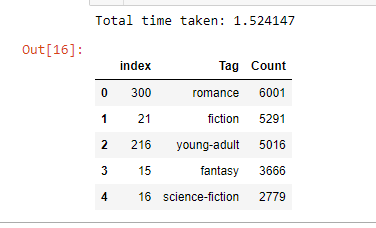


|                    | Time Taken |
| ------------------ | ---------- |
| Time taken by PC  | 1.52 s     |
| Time taken by EC2 | 0.87 s     |


## The information about the config of the EC2 instance

### EC2 instance was configured using the following commands:
sudo apt update

sudo apt upgrade

sudo apt install python3-pip

### Installed AWSCLI

msiexec.exe /i https://awscli.amazonaws.com/AWSCLIV2.msi

### Connected to EC2 instance

ssh -i "teekeypair.pem" ubuntu@ec2-54-80-115-100.compute-1.amazonaws.com

### Copied dataset and script from s3 to EC2 instance
aws s3 cp s3://teeadmbucket/HW2/list.json /home/ubuntu/

aws s3 cp s3://teeadmbucket/HW2/awsquestion.py /home/ubuntu/

### Ran using 

python3 awsquestion.py
